# **1 Introduction/Business problem**
## **1.1 Problem**
<h3 align = "Center">
The restaurant business is highly competitive. To be successful in this area, one need a carefully thought business plan.<br>
One major aspect of the business plan is to find a convenient place to host the business. I will be focusing on the Houston metro area.<br>
The goal is to find the 5 best neighborhoods in the Houston metro area for opening a new restaurant</h3>


## **1.2 Audience**
This study and results could be very helpful to anyone seeking to open a business in the Houston metro area. I am thinking here about individual or family own restaurant.
Also corporation looking to open new restaurant in this part of the country could also benefit from this work.
More generally,  anyone looking to open a restaurant anywhere in the country can use the method developed here an just feed in the corresponding data

# **2. Data description**
To complete this work, we will be using 2 dataset: The Foursquare dataset and census data

## **2.1 Foursquare data**
Foursquare is a company that provides information about venues in many locations. Foursquare will help us find restaurants in Houston neighborhood.
Their online website is at www.foursquare.com. Once a venue is located, it is also possible to look deeper into the venue to have more information about it.

## **2.2 StatisticalAtlas**
to find Houston county and Neighborhood, I use the statisticalatlas web page at www.statisticalatlas.com. By selecting the state (Texas) and the Metro area (Houston metro), 
I was able to get all the county and Neighborhood in the metro area. I then feed the information in the census data tool to get the statistics about the city or neighborhood.

## **2.3 census data**
the US Government conduct census every 10 years to gather information about US population. the US government then make these data public so that anyone interested can use it.
I use a specific tool call QuickFact from the census Bureau to get some statistical information about Houston neighborhoods. All the data I got was compiled on a csv file.
You can see the first lines of the file below

In [1]:

# importing the pandas and numpy library
import pandas as pd
import numpy as np

In [2]:
# reading the file into a panda dataframe and displaying the dimension
houston = pd.read_csv("Houston_City_Neighborhood_rev5.csv")
houston.shape


(64, 64)

In [3]:
# five first row of the dataframe
houston.head(20)

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,AllFirms2012,MenOwnedfirms2012,WomenOwnedFirms2012,MinorityOwnedFirms2012,NonminorityOwnedFirms2012,VeteranOwnedFirms2012,NonveteranOwnedFirms2012,PopulationPerSquareMile2010,LandAreaInSquareMiles2010,FIPSCode
0,Harris,Bellaire,"18,971","16,907",0.12,"16,855",0.06,0.27,0.15,0.51,...,"3,463","1,976",987,821,"2,515",256,"3,090","4,692.40",3.59,"""4807300"""
1,Harris,Baytown,"77,192","71,605",0.08,"71,802",0.08,0.28,0.12,0.50,...,"5,656","2,614","2,436","3,000","2,390",510,"4,745","2,025.70",35.45,"""4806128"""
2,Brazoria,Angleton,"19,431","18,829",0.03,"18,862",0.06,0.27,0.15,0.53,...,"1,633",809,654,621,943,119,"1,417","1,673.30",11.27,"""4803264"""
3,Brazoria,Alvin,"26,723","24,161",0.11,"24,236",0.08,0.26,0.12,0.50,...,"2,508","1,410",777,934,"1,452",155,"2,215",997.7,24.29,"""4802272"""
4,Liberty,Dayton,8389,7364,0.14,7242,0.06,0.26,0.13,0.54,...,1242,623,432,466,721,101,1110,343.5,21.08,"""4819432"""
5,Montgomery,Conroe,91079,65392,0.39,56207,0.07,0.24,0.13,0.50,...,5916,3037,2056,1975,3593,512,5008,1066.2,52.72,"""4816432"""
6,Brazoria,Clute,11690,11234,0.04,11211,0.06,0.27,0.10,0.51,...,839,346,384,320,466,53,698,2090,5.36,"""4815652"""
7,Liberty,Cleveland,8238,7826,0.05,7675,0.05,0.26,0.12,0.50,...,1260,809,330,381,800,80,1108,802.6,9.56,"""4815436"""
8,Waller,Brookshire,5816,4739,0.23,4702,0.06,0.28,0.08,0.48,...,576,304,162,231,318,F,504,1345,3.49,"""4810636"""
9,Harris,LaPorte,34976,33806,0.04,33800,0.07,0.24,0.12,0.51,...,2392,1280,844,766,1483,294,1933,1814,18.63,"""4841440"""


# **3 Methotodology**

## **3.1 Exploratory Data Analysis**

### **3.1.1 Missing values**

In [4]:
# count the values in each column to note column with missing values
varcount = houston.count()

In [5]:
varcount.head(60)

County                                                                        64
City                                                                          64
PopulationEstimates2019                                                       64
PopulationEstimates2010                                                       64
PopulationPercentChange2010TO2019                                             64
PopulationCensus2010                                                          64
PersonsUnder5Years                                                            64
PersonsUnder18Years                                                           64
Persons65YearsAndOver                                                         64
FemalePersons                                                                 64
WhiteAlone                                                                    64
BlackOrAfricanAmericanAlone                                                   64
AmericanIndianAndAlaskaNativ

In [6]:
varcount.tail(10)

AllFirms2012                   64
MenOwnedfirms2012              64
WomenOwnedFirms2012            64
MinorityOwnedFirms2012         64
NonminorityOwnedFirms2012      64
VeteranOwnedFirms2012          64
NonveteranOwnedFirms2012       64
PopulationPerSquareMile2010    64
LandAreaInSquareMiles2010      64
FIPSCode                       64
dtype: int64

### What are missing values in this dataset
it appears from the output above that each column has 64 elements with no missing value. But in this dataset, missing values have been replace by letter for referencing and explaining why there are no values. The letters are<br>
"-" Either no or too few sample observations were available to compute an estimate<br>
D   Suppressed to avoid disclosure of confidential information<br>
F   Fewer than 25 firms<br>
FN  Footnote on this item in place of data<br>
N   Data for this geographic area cannot be displayed because the number of sample cases is too small.<br>
NA  Not available<br>
S   Suppressed; does not meet publication standards<br>
X   Not applicable<br>
Z   Value greater than zero but less than half unit of measure shown<br>




In [7]:
# let first look at columns City for duplicate
houston["City"].value_counts()

Missouri City    2
Mont Belvieu     2
Santa Fe         1
Pasadena         1
Angleton         1
                ..
Tomball          1
Seabrook         1
Willis           1
Crosby County    1
Manvel           1
Name: City, Length: 62, dtype: int64

looks like MontBelvieu and MissouriCity are duplicate. let remove one of each so as to have just unique city names

In [8]:
# What are the index for rows with city name MontBelvieu 

mask = houston['City'] == 'Mont Belvieu'
houston[mask].index

Int64Index([15, 25], dtype='int64')

In [9]:
# What are the index for rows with city name MissouriCity

mask = houston['City'] == 'Missouri City'
houston[mask].index

Int64Index([16, 26], dtype='int64')

In [10]:
# drop the rows at indice 15 and 16
houston.drop(index = [15,16], inplace = True)
houston.shape

(62, 64)

In [11]:
houston.tail(1)

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,AllFirms2012,MenOwnedfirms2012,WomenOwnedFirms2012,MinorityOwnedFirms2012,NonminorityOwnedFirms2012,VeteranOwnedFirms2012,NonveteranOwnedFirms2012,PopulationPerSquareMile2010,LandAreaInSquareMiles2010,FIPSCode
63,Galveston,Galveston,50446,47741,0.06,47743,0.04,0.16,0.16,0.5,...,4354,2171,1554,1620,2443,401,3646,1158.2,41.22,"""4828068"""


In [12]:
houston.shape

(62, 64)

##### 

In [13]:
# assigning index so as to have  continuos value
houston.index = range(0, 62, 1)

In [14]:
houston.tail(1)

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,AllFirms2012,MenOwnedfirms2012,WomenOwnedFirms2012,MinorityOwnedFirms2012,NonminorityOwnedFirms2012,VeteranOwnedFirms2012,NonveteranOwnedFirms2012,PopulationPerSquareMile2010,LandAreaInSquareMiles2010,FIPSCode
61,Galveston,Galveston,50446,47741,0.06,47743,0.04,0.16,0.16,0.5,...,4354,2171,1554,1620,2443,401,3646,1158.2,41.22,"""4828068"""


In [15]:
# columns that have X as values
for i in houston.columns:
    if 'X' in houston[i].values:
      print(i)

PopulationEstimates2019
PopulationEstimates2010
PopulationPercentChange2010TO2019
HousingUnitsJuly2019
BuildingPermits,2019
TotalAccommodationAndFoodServicesSales2012T
TotalHealthCareAndSocialAssistanceReceiptsRevenue2012T
TotalManufacturersShipments2012T
TotalMerchantWholesalerSales2012T
TotalRetailSales2012T
TotalEmployerEstablishments2017
TotalEmployment2017
TotalAnnualPayroll2017T
TotalEmploymentPercentChange2016-2017
TotalnonemployerEstablishments2018


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
#let define below the columns containing X
Xcolumns = ["PopulationEstimates2019",
"PopulationEstimates2010",
"PopulationPercentChange2010TO2019",
"HousingUnitsJuly2019",
"BuildingPermits,2019",
"TotalAccommodationAndFoodServicesSales2012T",
"TotalHealthCareAndSocialAssistanceReceiptsRevenue2012T",
"TotalManufacturersShipments2012T",
"TotalMerchantWholesalerSales2012T",
"TotalRetailSales2012T",
"TotalEmployerEstablishments2017",
"TotalEmployment2017",
"TotalAnnualPayroll2017T",
"TotalEmploymentPercentChange2016-2017",
"TotalnonemployerEstablishments2018"]
houston[Xcolumns]

,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,HousingUnitsJuly2019,"BuildingPermits,2019",TotalAccommodationAndFoodServicesSales2012T,TotalHealthCareAndSocialAssistanceReceiptsRevenue2012T,TotalManufacturersShipments2012T,TotalMerchantWholesalerSales2012T,TotalRetailSales2012T,TotalEmployerEstablishments2017,TotalEmployment2017,TotalAnnualPayroll2017T,TotalEmploymentPercentChange2016-2017,TotalnonemployerEstablishments2018
0,"18,971","16,907",0.12,X,X,D,"366,317",D,"181,407","158,036",X,X,X,X,X
1,"77,192","71,605",0.08,X,X,"193,700","481,439",D,"163,969","1,572,221",X,X,X,X,X
2,"19,431","18,829",0.03,X,X,"28,351","91,736",D,D,"329,627",X,X,X,X,X
3,"26,723","24,161",0.11,X,X,"57,830",D,"5,364,252","186,714","650,203",X,X,X,X,X
4,8389,7364,0.14,X,X,12947,D,D,8312,110556,X,X,X,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,33474,32010,0.05,X,X,46625,59203,28034799,466116,283360,X,X,X,X,X
58,7914,6967,0.14,X,X,3954,D,D,19863,22603,X,X,X,X,X
59,8355,5768,0.45,X,X,11700,8848,80212,D,83861,X,X,X,X,X
60,57602,54635,0.05,25433,260,50668,D,D,D,712643,827,9055,357696,-0.046,3947


In [17]:
houston[Xcolumns].head(60)

,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,HousingUnitsJuly2019,"BuildingPermits,2019",TotalAccommodationAndFoodServicesSales2012T,TotalHealthCareAndSocialAssistanceReceiptsRevenue2012T,TotalManufacturersShipments2012T,TotalMerchantWholesalerSales2012T,TotalRetailSales2012T,TotalEmployerEstablishments2017,TotalEmployment2017,TotalAnnualPayroll2017T,TotalEmploymentPercentChange2016-2017,TotalnonemployerEstablishments2018
0,"18,971","16,907",0.12,X,X,D,"366,317",D,"181,407","158,036",X,X,X,X,X
1,"77,192","71,605",0.08,X,X,"193,700","481,439",D,"163,969","1,572,221",X,X,X,X,X
2,"19,431","18,829",0.03,X,X,"28,351","91,736",D,D,"329,627",X,X,X,X,X
3,"26,723","24,161",0.11,X,X,"57,830",D,"5,364,252","186,714","650,203",X,X,X,X,X
4,8389,7364,0.14,X,X,12947,D,D,8312,110556,X,X,X,X,X
5,91079,65392,0.39,X,X,175211,550509,1763537,5498035,2214051,X,X,X,X,X
6,11690,11234,0.04,X,X,25616,13120,D,77343,130599,X,X,X,X,X
7,8238,7826,0.05,X,X,32292,D,45076,D,388429,X,X,X,X,X
8,5816,4739,0.23,X,X,9974,D,210407,96096,130433,X,X,X,X,X
9,34976,33806,0.04,X,X,60234,34098,4902088,392261,217295,X,X,X,X,X


In [18]:
# we can see from the table above that some columns just have X as value. Which means they just have NaN. we will drop these columns

houstonnew = houston
houston.drop(columns = ["HousingUnitsJuly2019",
"BuildingPermits,2019", "TotalEmployerEstablishments2017",
"TotalEmployment2017",
"TotalAnnualPayroll2017T",
"TotalEmploymentPercentChange2016-2017",
"TotalnonemployerEstablishments2018"], inplace = True)


In [19]:
houston.tail()

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,AllFirms2012,MenOwnedfirms2012,WomenOwnedFirms2012,MinorityOwnedFirms2012,NonminorityOwnedFirms2012,VeteranOwnedFirms2012,NonveteranOwnedFirms2012,PopulationPerSquareMile2010,LandAreaInSquareMiles2010,FIPSCode
57,Harris,Deer Park,33474,32010,0.05,32010,0.06,0.26,0.12,0.50,...,1968,874,758,458,1383,295,1437,3061.4,10.46,"""4819624"""
58,Galveston,Hitchcock,7914,6967,0.14,6961,0.10,0.32,0.14,0.50,...,551,307,204,163,375,108,431,115.1,60.46,"""4834220"""
59,Waller,Hempstead,8355,5768,0.45,5770,0.10,0.31,0.12,0.44,...,725,367,308,396,305,93,606,1040.8,5.54,"""4833200"""
60,Liberty,Hardin County,57602,54635,0.05,54635,0.06,0.24,0.17,0.51,...,3199,1357,1335,439,2622,319,2607,61.3,890.57,"""48199"""
61,Galveston,Galveston,50446,47741,0.06,47743,0.04,0.16,0.16,0.50,...,4354,2171,1554,1620,2443,401,3646,1158.2,41.22,"""4828068"""


In [20]:
# columns that have X as values
#let define below the columns containing X
Xcolumnsnew = ["PopulationEstimates2019",
"PopulationEstimates2010",
"PopulationPercentChange2010TO2019",
"TotalAccommodationAndFoodServicesSales2012T",
"TotalHealthCareAndSocialAssistanceReceiptsRevenue2012T",
"TotalManufacturersShipments2012T",
"TotalMerchantWholesalerSales2012T",
"TotalRetailSales2012T"]


for i in Xcolumnsnew:
      print(houston[i].value_counts())

X         14
75457      1
122460     1
34976      1
50446      1
14149      1
7028       1
33474      1
6953       1
12671      1
27220      1
21129      1
38307      1
17319      1
15585      1
11690      1
40290      1
10466      1
91079      1
19,431     1
11451      1
7914       1
26,723     1
118488     1
9314       1
17438      1
13449      1
8389       1
5737       1
5816       1
21729      1
6574       1
12578      1
151227     1
57602      1
10757      1
77,192     1
15824      1
107536     1
6446       1
13914      1
8355       1
12136      1
8238       1
50094      1
17362      1
7890       1
11778      1
18,971     1
Name: PopulationEstimates2019, dtype: int64
X         14
10624      1
14119      1
66534      1
8409       1
3839       1
47741      1
16,907     1
1167       1
10553      1
45084      1
14516      1
6056       1
93117      1
24,161     1
6967       1
16995      1
71,605     1
7608       1
5768       1
7364       1
10715      1
11234      1
26833      1
33806  

In [21]:
houston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 57 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   County                                                                      62 non-null     object 
 1   City                                                                        62 non-null     object 
 2   PopulationEstimates2019                                                     62 non-null     object 
 3   PopulationEstimates2010                                                     62 non-null     object 
 4   PopulationPercentChange2010TO2019                                           62 non-null     object 
 5   PopulationCensus2010                                                        62 non-null     object 
 6   PersonsUnder5Years                                  

In [22]:
houston.columns


Index(['County', 'City', 'PopulationEstimates2019', 'PopulationEstimates2010',
       'PopulationPercentChange2010TO2019', 'PopulationCensus2010',
       'PersonsUnder5Years', 'PersonsUnder18Years', 'Persons65YearsAndOver',
       'FemalePersons', 'WhiteAlone', 'BlackOrAfricanAmericanAlone',
       'AmericanIndianAndAlaskaNativeAlone', 'AsianAlone',
       'NativeHawaiianAndOtherPacificIslander', 'TwoOrMoreRaces',
       'HispanicOrLatino', 'WhiteAloneNotHispanicOrLatino',
       'Veterans2014-2018', 'ForeignBornPersons2014-2018',
       'OwnerOccupiedHousingUnitRate2014-2018',
       'MedianValueOfOwner-occupiedHousingUnits2014-2018',
       'MedianSelectedMonthlyOwnerCostsWithAMortgage2014-2018',
       'MedianSelectedMonthlyOwnerCostsWithoutAMortgage2014-2018',
       'MedianGrossRent2014-2018', 'Households2014-2018',
       'PersonsPerHousehold2014-2018', 'LivingInSameHouse1yearAgo2014-2018',
       'LanguageOtherThanEnglishSpokenAtHomePercentOfPersonsAgeOver5Years2014-2018',
     

In [23]:
#getting the index of 'PopulationEstimates2019'
houston.columns.get_loc('PopulationEstimates2019')



2

In [24]:
#getting the index of ''PopulationEstimates2010''
houston.columns.get_loc('PopulationEstimates2010')

3

In [25]:
#getting the index of 'PopulationCensus2010'
houston.columns.get_loc('PopulationCensus2010')

5

In [26]:
#getting the index of 'PopulationPercentChange2010TO2019'
houston.columns.get_loc('PopulationPercentChange2010TO2019')

4

In [27]:
mask5 = houston['PopulationEstimates2019'] == "X"
houston[mask5].index

Int64Index([25, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51], dtype='int64')

In [28]:
mask6 = houston['PopulationEstimates2019'] == "X"
houston[mask6].index

Int64Index([25, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51], dtype='int64')

### Replacing "X" in columns 'PopulationEstimates2019' and  'PopulationEstimates2010' by the corresponding row value in column 'PopulationCensus2010'

In [29]:
#replacing the values of X with the value in census 10. I am assuming that the population remains the same where we have x in 2019 and 2010 estimate as the census values in 2010
houston.loc[[25, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51],('PopulationEstimates2019', 'PopulationEstimates2010' )]  = houston.loc[[25, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51], 'PopulationCensus2010']

In [30]:
houston.loc[[25, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51],('PopulationEstimates2019', 'PopulationEstimates2010' )]

,PopulationEstimates2019,PopulationEstimates2010
25,54298,54298
37,38289,38289
38,8619,8619
39,65844,65844
40,15869,15869
41,93847,93847
43,7522,7522
44,19069,19069
45,12382,12382
47,22942,22942


### Replacing "X" in columns 'PopulationPercentChange2010TO2019' by 0. this assume there was no population change for the city where we have x

In [31]:
mask6 = houston['PopulationPercentChange2010TO2019'] == "X"
houston[mask6].index

Int64Index([25, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51], dtype='int64')

In [32]:
#replacing the values of X with the value in census 10. I am assuming that the population remains the same (where we have x in 2019 and 2010 estimate) as the census values in 2010
houston.loc[[25, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51],'PopulationPercentChange2010TO2019']  = 0

In [33]:
houston.loc[[25, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51], 'PopulationPercentChange2010TO2019'] 

25    0
37    0
38    0
39    0
40    0
41    0
43    0
44    0
45    0
47    0
48    0
49    0
50    0
51    0
Name: PopulationPercentChange2010TO2019, dtype: object

In [34]:
houston.drop(columns = 'FIPSCode', inplace = True)

### converting to float and replacing all string as NaN values

In [35]:
columnnew = ['PopulationEstimates2019', 'PopulationEstimates2010',
       'PopulationPercentChange2010TO2019', 'PopulationCensus2010',
       'PersonsUnder5Years', 'PersonsUnder18Years', 'Persons65YearsAndOver',
       'FemalePersons', 'WhiteAlone', 'BlackOrAfricanAmericanAlone',
       'AmericanIndianAndAlaskaNativeAlone', 'AsianAlone',
       'NativeHawaiianAndOtherPacificIslander', 'TwoOrMoreRaces',
       'HispanicOrLatino', 'WhiteAloneNotHispanicOrLatino',
       'Veterans2014-2018', 'ForeignBornPersons2014-2018',
       'OwnerOccupiedHousingUnitRate2014-2018',
       'MedianValueOfOwner-occupiedHousingUnits2014-2018',
       'MedianSelectedMonthlyOwnerCostsWithAMortgage2014-2018',
       'MedianSelectedMonthlyOwnerCostsWithoutAMortgage2014-2018',
       'MedianGrossRent2014-2018', 'Households2014-2018',
       'PersonsPerHousehold2014-2018', 'LivingInSameHouse1yearAgo2014-2018',
       'LanguageOtherThanEnglishSpokenAtHomePercentOfPersonsAgeOver5Years2014-2018',
       'HouseholdsWithAComputer2014-2018',
       'HouseholdsWithABroadbandInternetSubscription2014-2018',
       'HighSchoolGraduateOrhigherPersonsAgeOver25Years2014-2018',
       "Bachelor'sDegreeOrHigherPersonsAgeOver25Years2014-2018",
       'WithDisabilityUnderAge65Years2014-2018',
       'PersonsWithoutHealthInsuranceUnderAge65Years',
       'InCivilianLaborForceTotalPercentOfPopulationAgeOver16Years2014-2018',
       'InCivilianLaborForceFemalePercentOfPopulationAge16Years2014-2018',
       'TotalAccommodationAndFoodServicesSales2012T',
       'TotalHealthCareAndSocialAssistanceReceiptsRevenue2012T',
       'TotalManufacturersShipments2012T', 'TotalMerchantWholesalerSales2012T',
       'TotalRetailSales2012T', 'TotalRetailSalesPerCapita2012',
       'MeanTravelTimeToWorkMinutesWorkersAgeOver16Years2014-2018',
       'MedianHouseholdIncome2014-2018',
       'PerCapitaIncomeInPast12Monts2014-2018', 'PersonsInPoverty',
       'AllFirms2012', 'MenOwnedfirms2012', 'WomenOwnedFirms2012',
       'MinorityOwnedFirms2012', 'NonminorityOwnedFirms2012',
       'VeteranOwnedFirms2012', 'NonveteranOwnedFirms2012',
       'PopulationPerSquareMile2010', 'LandAreaInSquareMiles2010']

# convert to numeric
for i in columnnew:
    houston[i] = pd.to_numeric(houston[i], errors = 'coerce')

In [36]:
houston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 56 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   County                                                                      62 non-null     object 
 1   City                                                                        62 non-null     object 
 2   PopulationEstimates2019                                                     58 non-null     float64
 3   PopulationEstimates2010                                                     58 non-null     float64
 4   PopulationPercentChange2010TO2019                                           62 non-null     float64
 5   PopulationCensus2010                                                        58 non-null     float64
 6   PersonsUnder5Years                                  

In [37]:
houston.columns

Index(['County', 'City', 'PopulationEstimates2019', 'PopulationEstimates2010',
       'PopulationPercentChange2010TO2019', 'PopulationCensus2010',
       'PersonsUnder5Years', 'PersonsUnder18Years', 'Persons65YearsAndOver',
       'FemalePersons', 'WhiteAlone', 'BlackOrAfricanAmericanAlone',
       'AmericanIndianAndAlaskaNativeAlone', 'AsianAlone',
       'NativeHawaiianAndOtherPacificIslander', 'TwoOrMoreRaces',
       'HispanicOrLatino', 'WhiteAloneNotHispanicOrLatino',
       'Veterans2014-2018', 'ForeignBornPersons2014-2018',
       'OwnerOccupiedHousingUnitRate2014-2018',
       'MedianValueOfOwner-occupiedHousingUnits2014-2018',
       'MedianSelectedMonthlyOwnerCostsWithAMortgage2014-2018',
       'MedianSelectedMonthlyOwnerCostsWithoutAMortgage2014-2018',
       'MedianGrossRent2014-2018', 'Households2014-2018',
       'PersonsPerHousehold2014-2018', 'LivingInSameHouse1yearAgo2014-2018',
       'LanguageOtherThanEnglishSpokenAtHomePercentOfPersonsAgeOver5Years2014-2018',
     

### some of the columns values has to be multiplied by 1000 to reflect the correct values as in the census data they were entered in tausends

In [38]:
houston[['TotalAccommodationAndFoodServicesSales2012T',
       'TotalHealthCareAndSocialAssistanceReceiptsRevenue2012T',
       'TotalManufacturersShipments2012T', 'TotalMerchantWholesalerSales2012T',
       'TotalRetailSales2012T']] =  houston[['TotalAccommodationAndFoodServicesSales2012T',
       'TotalHealthCareAndSocialAssistanceReceiptsRevenue2012T',
       'TotalManufacturersShipments2012T', 'TotalMerchantWholesalerSales2012T',
       'TotalRetailSales2012T']].multiply(1000)

In [39]:
houston[['TotalAccommodationAndFoodServicesSales2012T',
       'TotalHealthCareAndSocialAssistanceReceiptsRevenue2012T',
       'TotalManufacturersShipments2012T', 'TotalMerchantWholesalerSales2012T',
       'TotalRetailSales2012T']]

,TotalAccommodationAndFoodServicesSales2012T,TotalHealthCareAndSocialAssistanceReceiptsRevenue2012T,TotalManufacturersShipments2012T,TotalMerchantWholesalerSales2012T,TotalRetailSales2012T
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,12947000.0,NaN,NaN,8312000.0,110556000.0
...,...,...,...,...,...
57,46625000.0,59203000.0,2.803480e+10,466116000.0,283360000.0
58,3954000.0,NaN,NaN,19863000.0,22603000.0
59,11700000.0,8848000.0,8.021200e+07,NaN,83861000.0
60,50668000.0,NaN,NaN,NaN,712643000.0


### some of the columns have a lot of Null and may have to be deleted
'TotalAccommodationAndFoodServicesSales2012T', 'TotalHealthCareAndSocialAssistanceReceiptsRevenue2012T', 'TotalManufacturersShipments2012T', 'TotalMerchantWholesalerSales2012T', 'TotalRetailSalesPerCapita2012'
       

### replacing the remaining null value in each column by the average value of the corresponding column

In [40]:
houston.fillna(houston.mean(), inplace = True)


## Geolocalization of the city on map

### Importing the libraries necessary for plotting and clustering

In [41]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [42]:
# create new column name state
houston['state'] = 'Texas'

In [43]:
#create new column named address
houston['address'] = houston["City"] + ',' + houston["County"] + ',' + houston["state"]
houston.head()
      
    


,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,MenOwnedfirms2012,WomenOwnedFirms2012,MinorityOwnedFirms2012,NonminorityOwnedFirms2012,VeteranOwnedFirms2012,NonveteranOwnedFirms2012,PopulationPerSquareMile2010,LandAreaInSquareMiles2010,state,address
0,Harris,Bellaire,30549.568966,27453.448276,0.12,26747.586207,0.06,0.27,0.15,0.51,...,1390.517241,987.00,821.00,1345.275862,256.0,2368.298246,2035.138983,3.59,Texas,"Bellaire,Harris,Texas"
1,Harris,Baytown,30549.568966,27453.448276,0.08,26747.586207,0.08,0.28,0.12,0.50,...,1390.517241,1007.65,1252.25,1345.275862,510.0,2368.298246,2035.138983,35.45,Texas,"Baytown,Harris,Texas"
2,Brazoria,Angleton,30549.568966,27453.448276,0.03,26747.586207,0.06,0.27,0.15,0.53,...,809.000000,654.00,621.00,943.000000,119.0,2368.298246,2035.138983,11.27,Texas,"Angleton,Brazoria,Texas"
3,Brazoria,Alvin,30549.568966,27453.448276,0.11,26747.586207,0.08,0.26,0.12,0.50,...,1390.517241,777.00,934.00,1345.275862,155.0,2368.298246,997.700000,24.29,Texas,"Alvin,Brazoria,Texas"
4,Liberty,Dayton,8389.000000,7364.000000,0.14,7242.000000,0.06,0.26,0.13,0.54,...,623.000000,432.00,466.00,721.000000,101.0,1110.000000,343.500000,21.08,Texas,"Dayton,Liberty,Texas"


In [44]:
from geopy.extra.rate_limiter import RateLimiter

# 0 using geocode service nominatin to create a locator
locator = Nominatim(user_agent='myGeocoder')

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
houston['location'] = houston['address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
houston['point'] = houston['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
houston[['latitude', 'longitude', 'altitude']] = pd.DataFrame(houston['point'].tolist(), index=houston.index)

In [45]:
houston.head(60)

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,NonveteranOwnedFirms2012,PopulationPerSquareMile2010,LandAreaInSquareMiles2010,state,address,location,point,latitude,longitude,altitude
0,Harris,Bellaire,30549.568966,27453.448276,0.12,26747.586207,0.06,0.27,0.15,0.51,...,2368.298246,2035.138983,3.59,Texas,"Bellaire,Harris,Texas","(Bellaire, Harris County, Texas, United States...","(29.7057858, -95.4588299, 0.0)",29.705786,-95.458830,0.0
1,Harris,Baytown,30549.568966,27453.448276,0.08,26747.586207,0.08,0.28,0.12,0.50,...,2368.298246,2035.138983,35.45,Texas,"Baytown,Harris,Texas","(Baytown, Harris County, Texas, United States ...","(29.7355047, -94.9774274, 0.0)",29.735505,-94.977427,0.0
2,Brazoria,Angleton,30549.568966,27453.448276,0.03,26747.586207,0.06,0.27,0.15,0.53,...,2368.298246,2035.138983,11.27,Texas,"Angleton,Brazoria,Texas","(Angleton, Brazoria County, Texas, 77515, Unit...","(29.16941, -95.4318847, 0.0)",29.169410,-95.431885,0.0
3,Brazoria,Alvin,30549.568966,27453.448276,0.11,26747.586207,0.08,0.26,0.12,0.50,...,2368.298246,997.700000,24.29,Texas,"Alvin,Brazoria,Texas","(Alvin, Brazoria County, Texas, United States ...","(29.4238472, -95.2441009, 0.0)",29.423847,-95.244101,0.0
4,Liberty,Dayton,8389.000000,7364.000000,0.14,7242.000000,0.06,0.26,0.13,0.54,...,1110.000000,343.500000,21.08,Texas,"Dayton,Liberty,Texas","(Dayton, Liberty County, Texas, 77535, United ...","(30.0473202, -94.8873913, 0.0)",30.047320,-94.887391,0.0
5,Montgomery,Conroe,91079.000000,65392.000000,0.39,56207.000000,0.07,0.24,0.13,0.50,...,5008.000000,1066.200000,52.72,Texas,"Conroe,Montgomery,Texas","(Conroe, Montgomery County, Texas, United Stat...","(30.3118769, -95.4560512, 0.0)",30.311877,-95.456051,0.0
6,Brazoria,Clute,11690.000000,11234.000000,0.04,11211.000000,0.06,0.27,0.10,0.51,...,698.000000,2090.000000,5.36,Texas,"Clute,Brazoria,Texas","(Clute, Brazoria County, Texas, 77531, United ...","(29.0246906, -95.3988291, 0.0)",29.024691,-95.398829,0.0
7,Liberty,Cleveland,8238.000000,7826.000000,0.05,7675.000000,0.05,0.26,0.12,0.50,...,1108.000000,802.600000,9.56,Texas,"Cleveland,Liberty,Texas","(Cleveland, Liberty County, Texas, 77327, Unit...","(30.3417711, -95.0854786, 0.0)",30.341771,-95.085479,0.0
8,Waller,Brookshire,5816.000000,4739.000000,0.23,4702.000000,0.06,0.28,0.08,0.48,...,504.000000,1345.000000,3.49,Texas,"Brookshire,Waller,Texas","(Brookshire, Waller County, Texas, United Stat...","(29.7860643, -95.9510661, 0.0)",29.786064,-95.951066,0.0
9,Harris,LaPorte,34976.000000,33806.000000,0.04,33800.000000,0.07,0.24,0.12,0.51,...,1933.000000,1814.000000,18.63,Texas,"LaPorte,Harris,Texas","(First Assembly of God of LaPorte Church, Texa...","(29.6521728, -95.0179839, 0.0)",29.652173,-95.017984,0.0


In [46]:

houston_data = houston[['County', 'City', 'latitude', 'longitude' ]]
houston_data.head()

,County,City,latitude,longitude
0,Harris,Bellaire,29.705786,-95.458830
1,Harris,Baytown,29.735505,-94.977427
2,Brazoria,Angleton,29.169410,-95.431885
3,Brazoria,Alvin,29.423847,-95.244101
4,Liberty,Dayton,30.047320,-94.887391


In [47]:
houston_data[houston_data['City'] =='Lake Jackson']

,County,City,latitude,longitude
18,Brazoria,Lake Jackson,29.033857,-95.434386


In [48]:
houston_data[houston_data['City'] =='Pecan Grove']

,County,City,latitude,longitude
50,Fort Bend,Pecan Grove,29.626068,-95.731616


In [49]:
houston_data.drop(houston_data.index[[18, 50]], inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
houston_data[houston_data['City'] =='Lake Jackson']

,County,City,latitude,longitude


In [51]:
houston_data[houston_data['City'] =='Pecan Grove']

,County,City,latitude,longitude


In [52]:
houston_data.columns = ['County', 'Neighborhood', 'latitude', 'longitude']
houston_data.head()

,County,Neighborhood,latitude,longitude
0,Harris,Bellaire,29.705786,-95.458830
1,Harris,Baytown,29.735505,-94.977427
2,Brazoria,Angleton,29.169410,-95.431885
3,Brazoria,Alvin,29.423847,-95.244101
4,Liberty,Dayton,30.047320,-94.887391


In [53]:
# checking if there is na in location column
houston['location'].isna().head(60)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
Name: location, dtype: bool

### create a map of Houston  city 

In [54]:
# create map of Houston using latitude and longitude values
map_houston = folium.Map(location=[29.4, -95.2], zoom_start=10)

# add markers to map
for lat, lng, County, City in zip(houston['latitude'], houston['longitude'], houston['County'], houston['City']):
    label = '{}, {}'.format(City, County)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_houston)  
    
map_houston

## **3.2 Machine Learning**

### 3.2.1 Using Foursquare to find the venues in Houston Neighborhood

### Define Foursquare Credential and Version

In [176]:
CLIENT_ID = 'EF4KMZRCFGEEEVJBJXWTRHJPCSCUNNQN4OESMZGZZXWSOVR2' # your Foursquare ID
CLIENT_SECRET = '04NBL5KCPZMGAJO0IA2VEH5HXM0RTE2DOOPQGUZQYZ2CAZVL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EF4KMZRCFGEEEVJBJXWTRHJPCSCUNNQN4OESMZGZZXWSOVR2
CLIENT_SECRET:04NBL5KCPZMGAJO0IA2VEH5HXM0RTE2DOOPQGUZQYZ2CAZVL


### The function define below will be used to get the venues in Houston Neighborhood

In [181]:
LIMIT = 100
# a radius of 8049 meters is about 5 miles
def getNearbyVenues(names, latitudes, longitudes, radius=8049):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Getting the nearby venues for Houston Neighborhoods

In [182]:
# Call function getNearbyVenues on houston Neighborhood

Houston_venues = getNearbyVenues(names=houston['City'],
                                   latitudes=houston['latitude'],
                                   longitudes=houston['longitude']
                                  )



Bellaire
Baytown
Angleton
Alvin
Dayton
Conroe
Clute
Cleveland
Brookshire
LaPorte
LaMarque
Katy
Jersey Village
Jacinto City
Humble
Manvel
Liberty
League City
Lake Jackson
Richmond
Prairie View
Pearland
Pasadena
Mont Belvieu
Missouri City
Spring
South Houston
Sealy
Seabrook
Santa Fe
Rosenberg
West University Place
Webster
Tomball
Texas City
Sugar Land
Stafford city
Channelview
Bacliff
Atascocita
Aldine
The Woodlands
Willis
Highlands
Fresno
Four Corners
Crosby County
Cloverleaf
Cinco Ranch
Sienna Plantation
Pecan Grove
Mission Bend
Galena Park
Fulshear
Friendswood
Freeport
Dickinson
Deer Park
Hitchcock
Hempstead
Hardin County
Galveston


In [183]:
print(Houston_venues.shape)
Houston_venues.head()


(4801, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bellaire,29.705786,-95.45883,Fadi's Meyerland Mediterranean Grill,29.689590,-95.460313,Middle Eastern Restaurant
1,Bellaire,29.705786,-95.45883,Whole Foods Market,29.706833,-95.441692,Grocery Store
2,Bellaire,29.705786,-95.45883,Chick-fil-A,29.688802,-95.465120,Fast Food Restaurant
3,Bellaire,29.705786,-95.45883,Weekley Family YMCA,29.699716,-95.439474,Gym
4,Bellaire,29.705786,-95.45883,Houston Gymnastics Academy,29.719157,-95.468449,Gymnastics Gym


### how many venues where return for each neighborhood

In [184]:
Houston_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aldine,100,100,100,100,100,100
Alvin,79,79,79,79,79,79
Angleton,40,40,40,40,40,40
Atascocita,86,86,86,86,86,86
Bacliff,79,79,79,79,79,79
...,...,...,...,...,...,...
The Woodlands,100,100,100,100,100,100
Tomball,100,100,100,100,100,100
Webster,100,100,100,100,100,100


### let extract just the restaurant from the venues

In [185]:
Houston_venues['Venue Category'].unique()

array(['Middle Eastern Restaurant', 'Grocery Store',
       'Fast Food Restaurant', 'Gym', 'Gymnastics Gym', 'Ice Cream Shop',
       'Cuban Restaurant', 'Coffee Shop', 'Convenience Store', 'Café',
       'Furniture / Home Store', 'Trail', "Women's Store", 'Bakery',
       'Park', 'Shopping Mall', 'Donut Shop', 'Health & Beauty Service',
       'Mediterranean Restaurant', 'Department Store', 'Eye Doctor',
       'Steakhouse', 'Clothing Store', 'Cosmetics Shop', 'Burger Joint',
       'Movie Theater', 'Japanese Restaurant', 'Gourmet Shop',
       'French Restaurant', 'Hotel', 'Electronics Store', 'Churrascaria',
       'Sushi Restaurant', 'Warehouse Store', 'Taco Place',
       'Seafood Restaurant', 'Food Truck', 'American Restaurant',
       'Hotel Bar', 'New American Restaurant', 'Wine Shop', 'Restaurant',
       'Chinese Restaurant', 'Deli / Bodega', 'Sandwich Place',
       'Frozen Yogurt Shop', 'Juice Bar', 'Smoothie Shop', 'Gift Shop',
       'Dessert Shop', 'Gym / Fitness Center'

In [186]:
# using the str.contains method to get all the venue with category Restaurant 
Houston_venues[Houston_venues['Venue Category'].str.contains('Restaurant')]




,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bellaire,29.705786,-95.458830,Fadi's Meyerland Mediterranean Grill,29.689590,-95.460313,Middle Eastern Restaurant
2,Bellaire,29.705786,-95.458830,Chick-fil-A,29.688802,-95.465120,Fast Food Restaurant
6,Bellaire,29.705786,-95.458830,Cafe Piquet,29.700276,-95.481887,Cuban Restaurant
18,Bellaire,29.705786,-95.458830,Mary'z Lebanese Cuisine,29.731227,-95.482201,Mediterranean Restaurant
30,Bellaire,29.705786,-95.458830,Roka Akor,29.738590,-95.441658,Japanese Restaurant
...,...,...,...,...,...,...,...
4779,Galveston,29.299328,-94.794588,Porch Cafe,29.319570,-94.750232,Restaurant
4780,Galveston,29.299328,-94.794588,Benno's,29.298128,-94.778364,Cajun / Creole Restaurant
4783,Galveston,29.299328,-94.794588,Cajun Greek - Seafood,29.276625,-94.831449,Seafood Restaurant
4788,Galveston,29.299328,-94.794588,Joe's Crab Shack,29.281570,-94.801496,Seafood Restaurant


In [190]:
# using the str.contains method to get all the venue with category Restaurant 
Houston_venues_restaurant = Houston_venues[Houston_venues['Venue Category'].str.contains('Restaurant')]
Houston_venues_restaurant.shape

(1234, 7)

In [188]:
# extracting venues without neighborhood latitude or longitude
sub_venues = Houston_venues_restaurant[['Neighborhood', 'Venue Latitude', 'Venue Longitude', 'Venue Category']]

In [189]:
sub_venue_mean = sub_venues.groupby('Neighborhood').mean()

sub_venue_mean

,Venue Latitude,Venue Longitude
Neighborhood,,
Aldine,29.898604,-95.370529
Alvin,29.422301,-95.236024
Angleton,29.179284,-95.429897
Atascocita,30.012310,-95.167041
Bacliff,29.529418,-95.008115
...,...,...
The Woodlands,30.174297,-95.473803
Tomball,30.107958,-95.596545
Webster,29.542335,-95.127965


In [88]:
number = Houston_venues_restaurant.groupby('Neighborhood').count()

In [89]:
# assigning a new column named 'number of restaurant' to sub_venue_mean

sub_venue_mean['number of restuarant'] = number['Neighborhood Latitude']
sub_venue_mean

,Venue Latitude,Venue Longitude,number of restuarant
Neighborhood,,,
Aldine,29.898604,-95.370529,22
Alvin,29.422301,-95.236024,18
Angleton,29.179284,-95.429897,6
Atascocita,30.012310,-95.167041,22
Bacliff,29.529418,-95.008115,22
...,...,...,...
The Woodlands,30.174297,-95.473803,29
Tomball,30.107958,-95.596545,25
Webster,29.542335,-95.127965,29


In [90]:
# extracting venues without neighborhood latitude or longitude
sub_venues = Houston_venues_restaurant[['Neighborhood', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']]

In [91]:
# inner joint the 2 dataframe using the common column PostalCode

houston_census_venues = pd.merge(left = houston,  right = sub_venue_mean, left_on = 'City', right_on = 'Neighborhood')
houston_census_venues.head()


,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,state,address,location,point,latitude,longitude,altitude,Venue Latitude,Venue Longitude,number of restuarant
0,Harris,Bellaire,30549.568966,27453.448276,0.12,26747.586207,0.06,0.27,0.15,0.51,...,Texas,"Bellaire,Harris,Texas","(Bellaire, Harris County, Texas, United States...","(29.7057858, -95.4588299, 0.0)",29.705786,-95.458830,0.0,29.729963,-95.453304,22
1,Harris,Baytown,30549.568966,27453.448276,0.08,26747.586207,0.08,0.28,0.12,0.50,...,Texas,"Baytown,Harris,Texas","(Baytown, Harris County, Texas, United States ...","(29.7355047, -94.9774274, 0.0)",29.735505,-94.977427,0.0,29.768472,-94.980612,23
2,Brazoria,Angleton,30549.568966,27453.448276,0.03,26747.586207,0.06,0.27,0.15,0.53,...,Texas,"Angleton,Brazoria,Texas","(Angleton, Brazoria County, Texas, 77515, Unit...","(29.16941, -95.4318847, 0.0)",29.169410,-95.431885,0.0,29.179284,-95.429897,6
3,Brazoria,Alvin,30549.568966,27453.448276,0.11,26747.586207,0.08,0.26,0.12,0.50,...,Texas,"Alvin,Brazoria,Texas","(Alvin, Brazoria County, Texas, United States ...","(29.4238472, -95.2441009, 0.0)",29.423847,-95.244101,0.0,29.422301,-95.236024,18
4,Liberty,Dayton,8389.000000,7364.000000,0.14,7242.000000,0.06,0.26,0.13,0.54,...,Texas,"Dayton,Liberty,Texas","(Dayton, Liberty County, Texas, 77535, United ...","(30.0473202, -94.8873913, 0.0)",30.047320,-94.887391,0.0,30.045154,-94.891432,6


In [92]:
# let sort to find the Neighborhood with most number of restaurant

sorted_data = houston_census_venues.sort_values('number of restuarant')


In [93]:
sorted_data.head()

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,state,address,location,point,latitude,longitude,altitude,Venue Latitude,Venue Longitude,number of restuarant
27,Austin,Sealy,6446.000000,6123.000000,0.05,6019.000000,0.08,0.28,0.17,0.58,...,Texas,"Sealy,Austin,Texas","(Sealy, Austin County, Texas, 77474, United St...","(29.7789913, -96.1568381, 0.0)",29.778991,-96.156838,0.0,29.764889,-96.152793,4
8,Waller,Brookshire,5816.000000,4739.000000,0.23,4702.000000,0.06,0.28,0.08,0.48,...,Texas,"Brookshire,Waller,Texas","(Brookshire, Waller County, Texas, United Stat...","(29.7860643, -95.9510661, 0.0)",29.786064,-95.951066,0.0,29.778179,-95.934754,4
15,Brazoria,Manvel,12671.000000,5219.000000,1.43,5179.000000,0.09,0.35,0.09,0.53,...,Texas,"Manvel,Brazoria,Texas","(Manvel, Brazoria County, Texas, United States...","(29.4664706, -95.355714, 0.0)",29.466471,-95.355714,0.0,29.473438,-95.375078,5
49,Fort Bend,Sienna Plantation,13721.000000,13721.000000,0.00,13721.000000,0.04,0.33,0.07,0.48,...,Texas,"Sienna Plantation,Fort Bend,Texas","(Sienna Plantation, Fort Bend County, Texas, 7...","(29.4860708, -95.5079991, 0.0)",29.486071,-95.507999,0.0,29.523450,-95.498559,5
2,Brazoria,Angleton,30549.568966,27453.448276,0.03,26747.586207,0.06,0.27,0.15,0.53,...,Texas,"Angleton,Brazoria,Texas","(Angleton, Brazoria County, Texas, 77515, Unit...","(29.16941, -95.4318847, 0.0)",29.169410,-95.431885,0.0,29.179284,-95.429897,6


In [94]:
sorted_data.tail()

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,state,address,location,point,latitude,longitude,altitude,Venue Latitude,Venue Longitude,number of restuarant
21,Brazoria,Pearland,122460.0,93117.0,0.32,91252.0,0.08,0.27,0.11,0.51,...,Texas,"Pearland,Brazoria,Texas","(Pearland, Brazoria County, Texas, United Stat...","(29.5639758, -95.2864299, 0.0)",29.563976,-95.286430,0.0,29.567091,-95.281553,31
35,Fort Bend,Sugar Land,118488.0,107835.0,0.10,78817.0,0.05,0.24,0.15,0.51,...,Texas,"Sugar Land,Fort Bend,Texas","(Sugar Land, Fort Bend County, Texas, United S...","(29.6196787, -95.6349463, 0.0)",29.619679,-95.634946,0.0,29.604928,-95.617392,31
14,Harris,Humble,15824.0,15127.0,0.05,15133.0,0.10,0.24,0.12,0.52,...,Texas,"Humble,Harris,Texas","(Humble, Harris County, Texas, United States o...","(29.9988312, -95.2621553, 0.0)",29.998831,-95.262155,0.0,29.996967,-95.255194,31
13,Harris,Jacinto City,10466.0,10553.0,-0.01,10553.0,0.08,0.27,0.11,0.50,...,Texas,"Jacinto City,Harris,Texas","(Jacinto City, Harris County, Texas, United St...","(29.7673433, -95.2336723, 0.0)",29.767343,-95.233672,0.0,29.775474,-95.219736,35
52,Harris,Galena Park,10757.0,10899.0,-0.01,10887.0,0.06,0.30,0.08,0.49,...,Texas,"Galena Park,Harris,Texas","(Galena Park, Harris County, Texas, 77547, Uni...","(29.7335616, -95.2302123, 0.0)",29.733562,-95.230212,0.0,29.735357,-95.226164,38


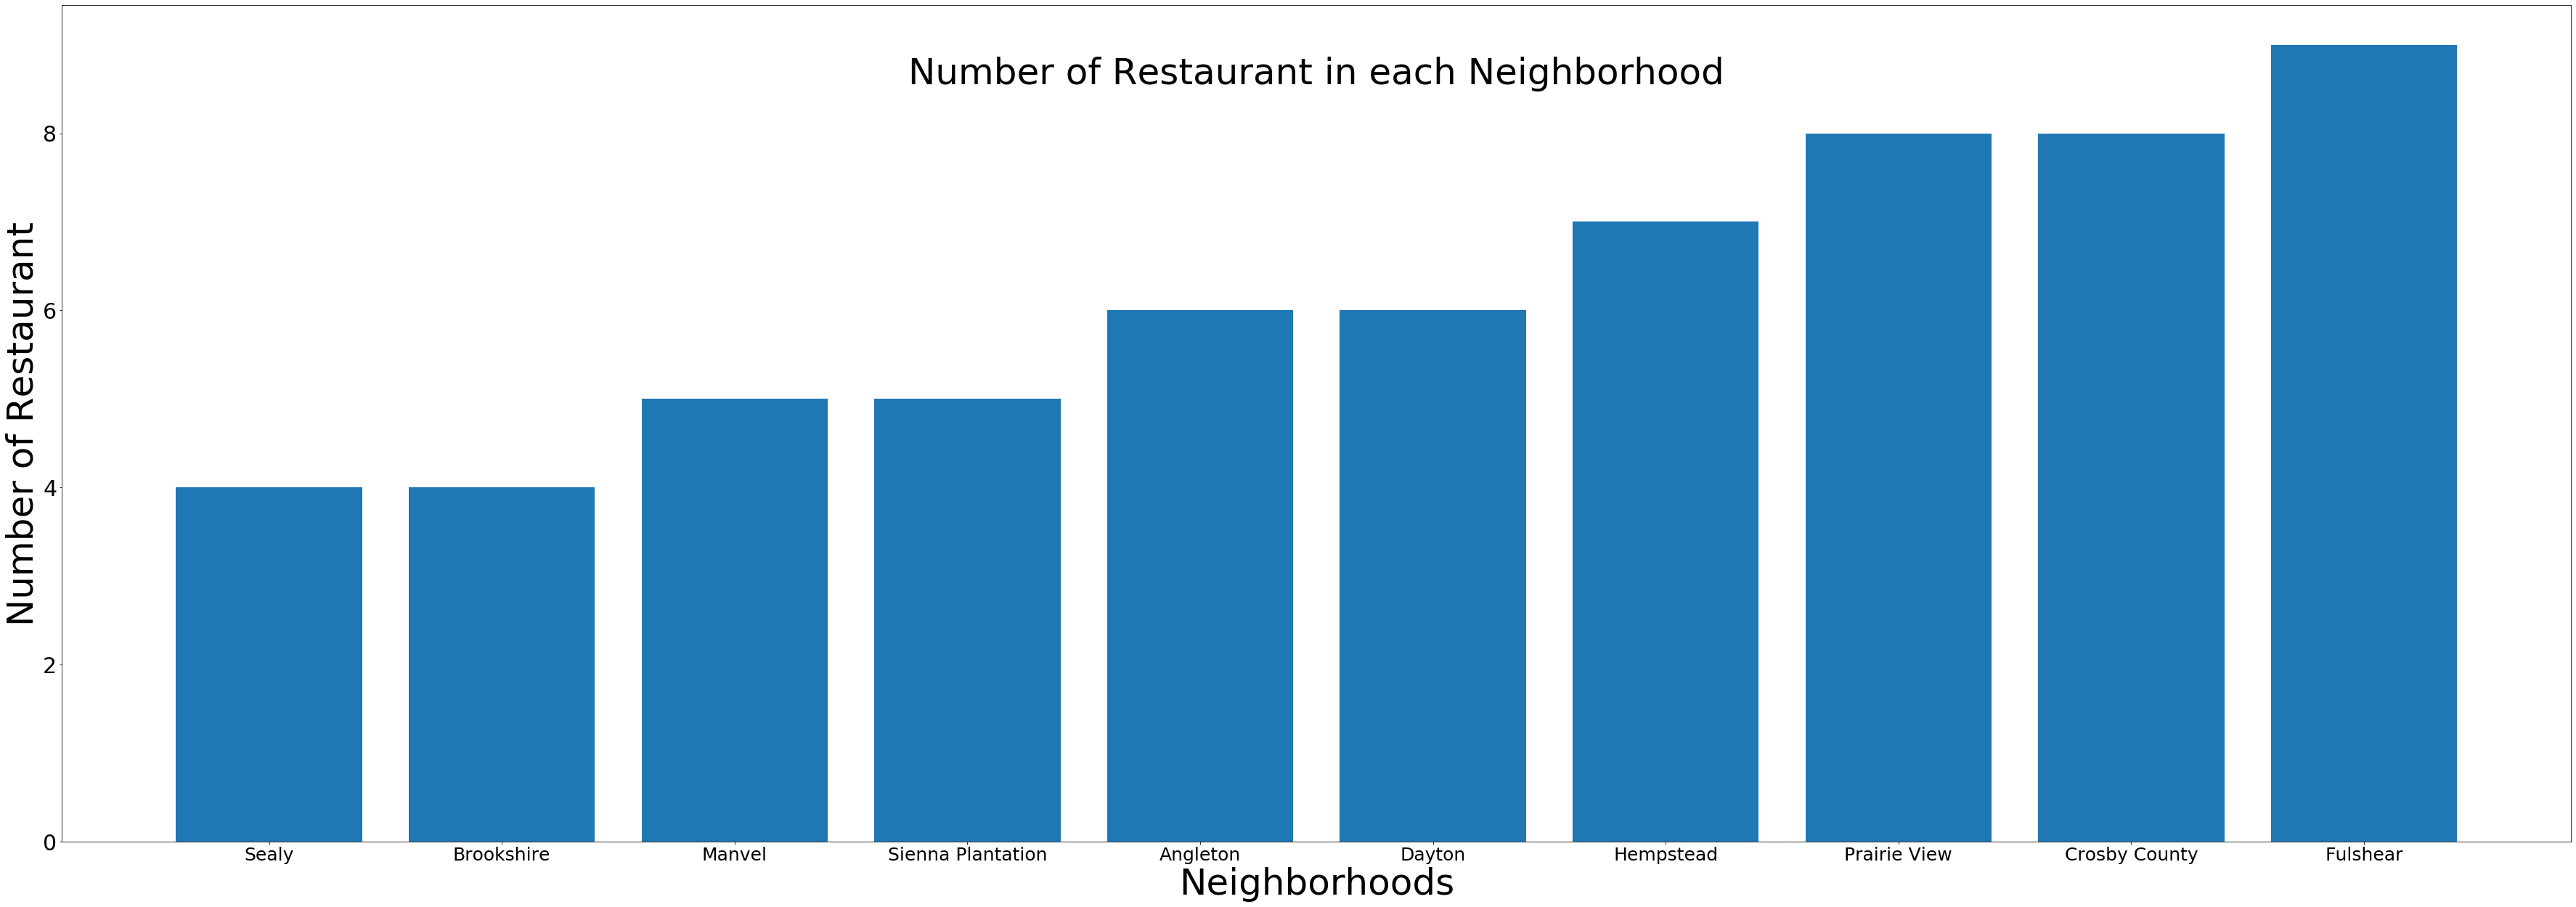

In [95]:
# plot the data to visualize the number of restaurant by neighborhood. just the 10 first neighborhood with less restaurant

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,8,4])
Neighborhood = sorted_data['City'].head(10)
numberOfRestaurant = sorted_data['number of restuarant'].head(10)
ax.bar(Neighborhood, numberOfRestaurant)

plt.xticks(size = 25)
plt.yticks(size = 30)
plt.xlabel('Neighborhoods', fontsize = 50, x=0.5, y= -0.001)
plt.ylabel('Number of Restaurant', fontsize = 50, x=0.3, y= 0.5)

plt.title('Number of Restaurant in each Neighborhood', fontsize = 50, x=0.5, y=0.9)
plt.show()



### The 6 neighborhoods with the least number of restaurants are: Sealy, Brookshire, Manvel, Sienna Plantation, Angleton and Dayton

### let add some more columns to our data

In [96]:
# add new column number of restaurant per square foot
houston_census_venues['restaurantPerSquareFoot'] = houston_census_venues['number of restuarant']/houston_census_venues['LandAreaInSquareMiles2010']

In [97]:
# add new column number of restaurant per family income
houston_census_venues['restaurantPerIncome'] = houston_census_venues['number of restuarant']/houston_census_venues['MedianHouseholdIncome2014-2018']

In [98]:
# add new column number of restaurant per neighborhood population
houston_census_venues['restaurantPerPopulation'] = houston_census_venues['number of restuarant']/houston_census_venues['PopulationEstimates2019']

In [99]:
# let sort to find the neighborhood with less restaurant density

sorted_data = houston_census_venues.sort_values('restaurantPerSquareFoot')


In [100]:
sorted_data.head()

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,point,latitude,longitude,altitude,Venue Latitude,Venue Longitude,number of restuarant,restaurantPerSquareFoot,restaurantPerIncome,restaurantPerPopulation
46,Harris,Crosby County,5737.0,6056.0,-0.05,6059.0,0.06,0.26,0.19,0.50,...,"(29.9118885, -95.0621941, 0.0)",29.911888,-95.062194,0.0,29.903759,-95.066924,8,0.008887,0.000211,0.001394
34,Galveston,Texas City,50094.0,45084.0,0.11,45099.0,0.07,0.25,0.15,0.53,...,"(29.396013, -94.9175485, 0.0)",29.396013,-94.917548,0.0,29.390039,-94.938119,13,0.203762,0.000283,0.000260
15,Brazoria,Manvel,12671.0,5219.0,1.43,5179.0,0.09,0.35,0.09,0.53,...,"(29.4664706, -95.355714, 0.0)",29.466471,-95.355714,0.0,29.473438,-95.375078,5,0.212675,0.000053,0.000395
58,Galveston,Hitchcock,7914.0,6967.0,0.14,6961.0,0.10,0.32,0.14,0.50,...,"(29.3482905, -95.0160368, 0.0)",29.348291,-95.016037,0.0,29.373730,-95.022381,13,0.215018,0.000256,0.001643
16,Liberty,Liberty,9314.0,8409.0,0.11,8397.0,0.11,0.28,0.12,0.49,...,"(30.0579966, -94.7954858, 0.0)",30.057997,-94.795486,0.0,30.065926,-94.787872,10,0.246305,0.000175,0.001074


In [101]:
sorted_data.tail()

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,point,latitude,longitude,altitude,Venue Latitude,Venue Longitude,number of restuarant,restaurantPerSquareFoot,restaurantPerIncome,restaurantPerPopulation
47,Harris,Cloverleaf,22942.0,22942.0,0.00,22942.0,0.08,0.33,0.08,0.49,...,"(29.7782823, -95.1718772, 0.0)",29.778282,-95.171877,0.0,29.783269,-95.189624,31,9.337349,0.000623,0.001351
26,Harris,South Houston,17438.0,16995.0,0.03,16983.0,0.10,0.33,0.09,0.47,...,"(29.663008, -95.2354902, 0.0)",29.663008,-95.235490,0.0,29.651201,-95.223152,29,9.508197,0.000629,0.001663
45,Fort Bend,Four Corners,12382.0,12382.0,0.00,12382.0,0.06,0.33,0.07,0.51,...,"(29.668566, -95.6577245, 0.0)",29.668566,-95.657725,0.0,29.670697,-95.643068,25,9.842520,0.000341,0.002019
31,Harris,West University Place,15585.0,14560.0,0.07,14787.0,0.09,0.31,0.14,0.51,...,"(29.7180075, -95.4338292, 0.0)",29.718007,-95.433829,0.0,29.733518,-95.428682,20,10.000000,0.000287,0.001283
13,Harris,Jacinto City,10466.0,10553.0,-0.01,10553.0,0.08,0.27,0.11,0.50,...,"(29.7673433, -95.2336723, 0.0)",29.767343,-95.233672,0.0,29.775474,-95.219736,35,18.716578,0.000936,0.003344


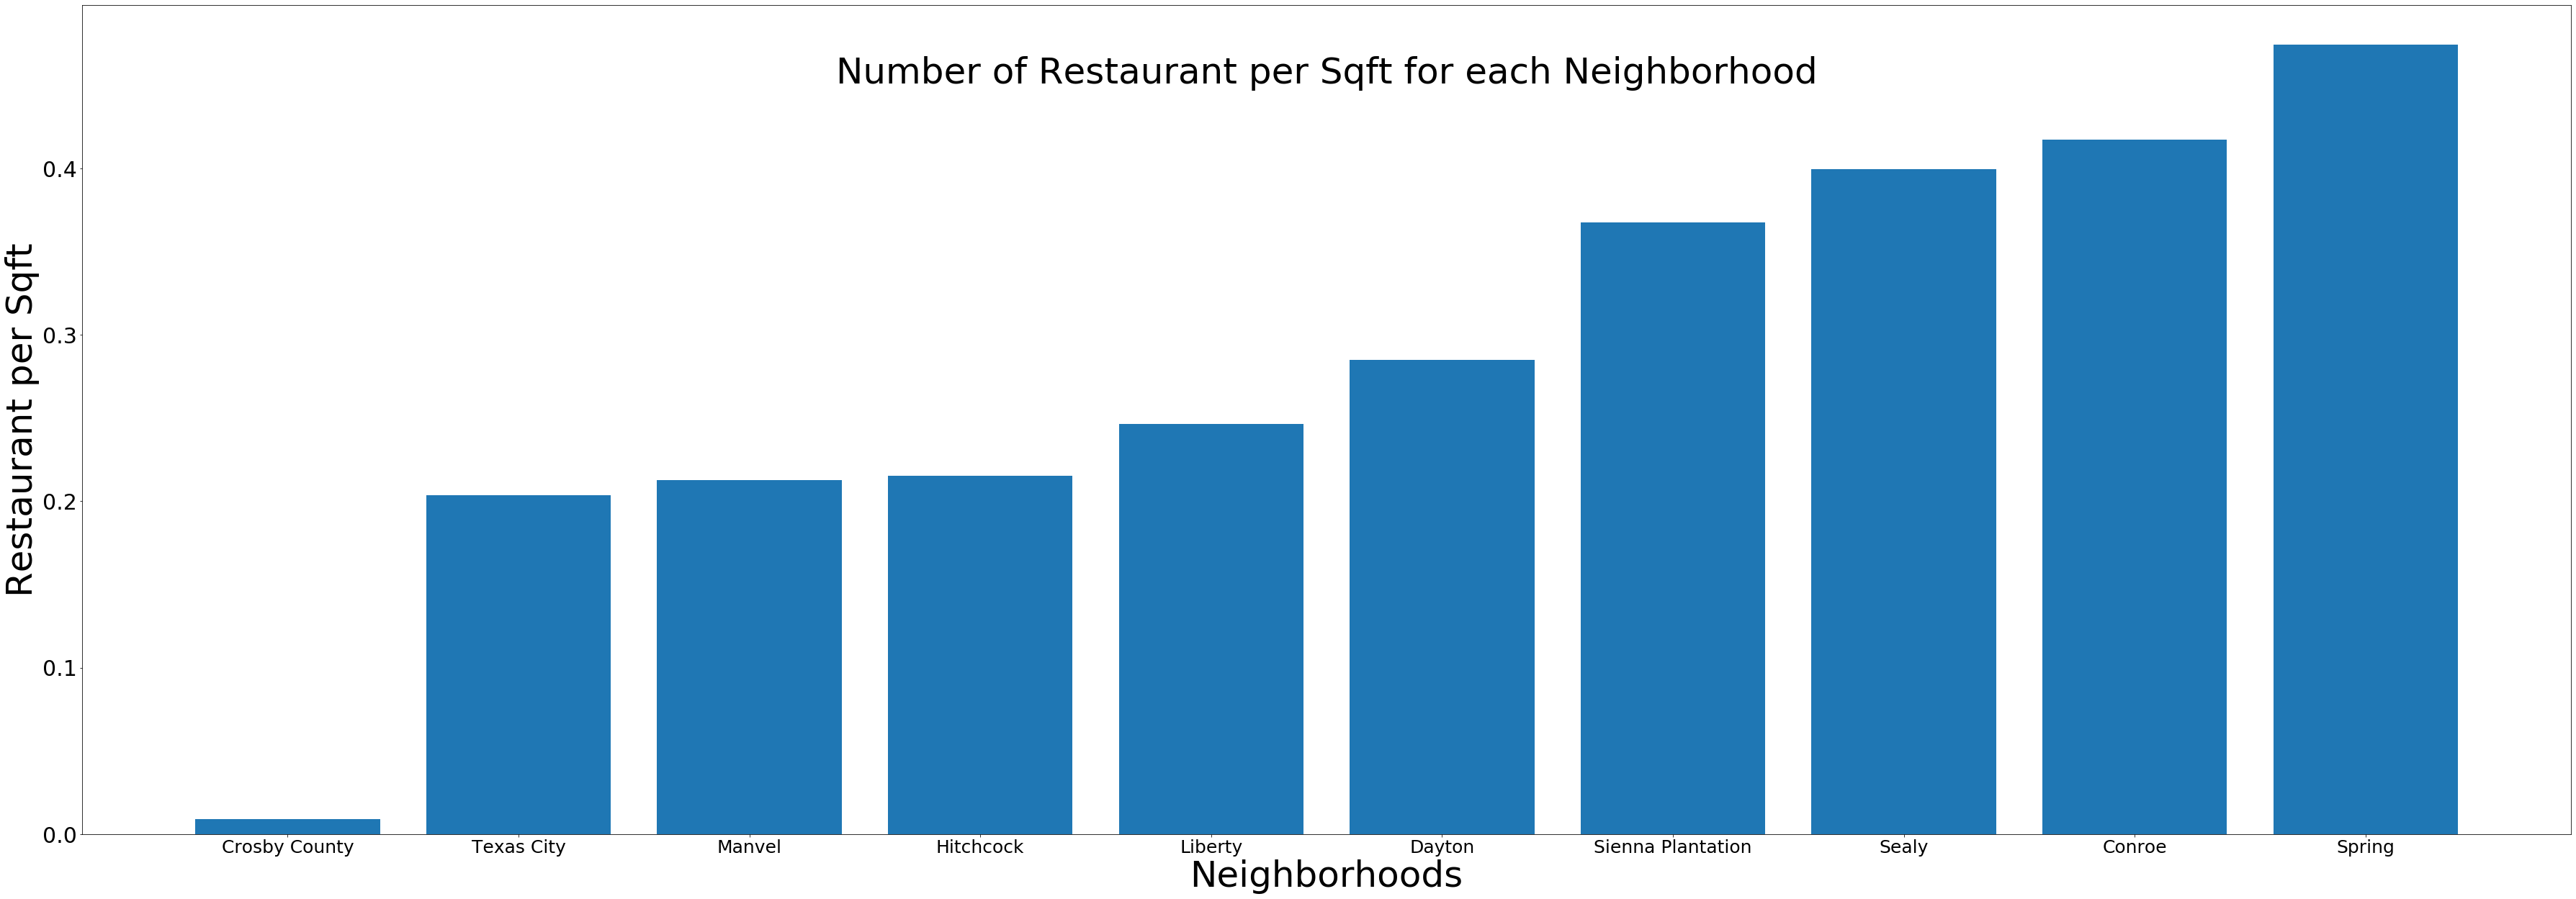

In [102]:
# plot the data to visualize the density of restaurant by neighborhood. the 10 less dense Neighborhood

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([2,2,8,4])
Neighborhood = sorted_data['City'].head(10)
restaurantPerSquareFoot = sorted_data['restaurantPerSquareFoot'].head(10)
ax.bar(Neighborhood, restaurantPerSquareFoot)
plt.xticks(size = 25)
plt.yticks(size = 30)
plt.xlabel('Neighborhoods', fontsize = 50, x=0.5, y= -0.001)
plt.ylabel('Restaurant per Sqft', fontsize = 50, x=0.3, y= 0.5)

plt.title('Number of Restaurant per Sqft for each Neighborhood', fontsize = 50, x=0.5, y=0.9)
plt.show()


### Crosby, Texas City, Manvel, Hitchcock, Liberty and Dayton are the 5 Neighborhoods with less restaurant per sqft

In [104]:
# let sort to find the neighborhood with less restaurant per family income

sorted_data = houston_census_venues.sort_values('restaurantPerIncome')


In [105]:
sorted_data.head()

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,point,latitude,longitude,altitude,Venue Latitude,Venue Longitude,number of restuarant,restaurantPerSquareFoot,restaurantPerIncome,restaurantPerPopulation
49,Fort Bend,Sienna Plantation,13721.0,13721.0,0.00,13721.0,0.04,0.33,0.07,0.48,...,"(29.4860708, -95.5079991, 0.0)",29.486071,-95.507999,0.0,29.523450,-95.498559,5,0.367377,0.000035,0.000364
53,Fort Bend,Fulshear,13914.0,1167.0,10.92,1134.0,0.09,0.34,0.06,0.50,...,"(29.690292, -95.8996261, 0.0)",29.690292,-95.899626,0.0,29.700778,-95.863018,9,1.113861,0.000051,0.000647
15,Brazoria,Manvel,12671.0,5219.0,1.43,5179.0,0.09,0.35,0.09,0.53,...,"(29.4664706, -95.355714, 0.0)",29.466471,-95.355714,0.0,29.473438,-95.375078,5,0.212675,0.000053,0.000395
27,Austin,Sealy,6446.0,6123.0,0.05,6019.0,0.08,0.28,0.17,0.58,...,"(29.7789913, -96.1568381, 0.0)",29.778991,-96.156838,0.0,29.764889,-96.152793,4,0.399600,0.000066,0.000621
8,Waller,Brookshire,5816.0,4739.0,0.23,4702.0,0.06,0.28,0.08,0.48,...,"(29.7860643, -95.9510661, 0.0)",29.786064,-95.951066,0.0,29.778179,-95.934754,4,1.146132,0.000106,0.000688


In [106]:
sorted_data.tail()

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,point,latitude,longitude,altitude,Venue Latitude,Venue Longitude,number of restuarant,restaurantPerSquareFoot,restaurantPerIncome,restaurantPerPopulation
26,Harris,South Houston,17438.0,16995.0,0.03,16983.0,0.10,0.33,0.09,0.47,...,"(29.663008, -95.2354902, 0.0)",29.663008,-95.235490,0.0,29.651201,-95.223152,29,9.508197,0.000629,0.001663
19,Fort Bend,Richmond,12578.0,12090.0,0.04,11679.0,0.07,0.27,0.11,0.50,...,"(29.5821811, -95.7607832, 0.0)",29.582181,-95.760783,0.0,29.575519,-95.746879,26,6.615776,0.000696,0.002067
14,Harris,Humble,15824.0,15127.0,0.05,15133.0,0.10,0.24,0.12,0.52,...,"(29.9988312, -95.2621553, 0.0)",29.998831,-95.262155,0.0,29.996967,-95.255194,31,3.169734,0.000753,0.001959
52,Harris,Galena Park,10757.0,10899.0,-0.01,10887.0,0.06,0.30,0.08,0.49,...,"(29.7335616, -95.2302123, 0.0)",29.733562,-95.230212,0.0,29.735357,-95.226164,38,7.818930,0.000844,0.003533
13,Harris,Jacinto City,10466.0,10553.0,-0.01,10553.0,0.08,0.27,0.11,0.50,...,"(29.7673433, -95.2336723, 0.0)",29.767343,-95.233672,0.0,29.775474,-95.219736,35,18.716578,0.000936,0.003344


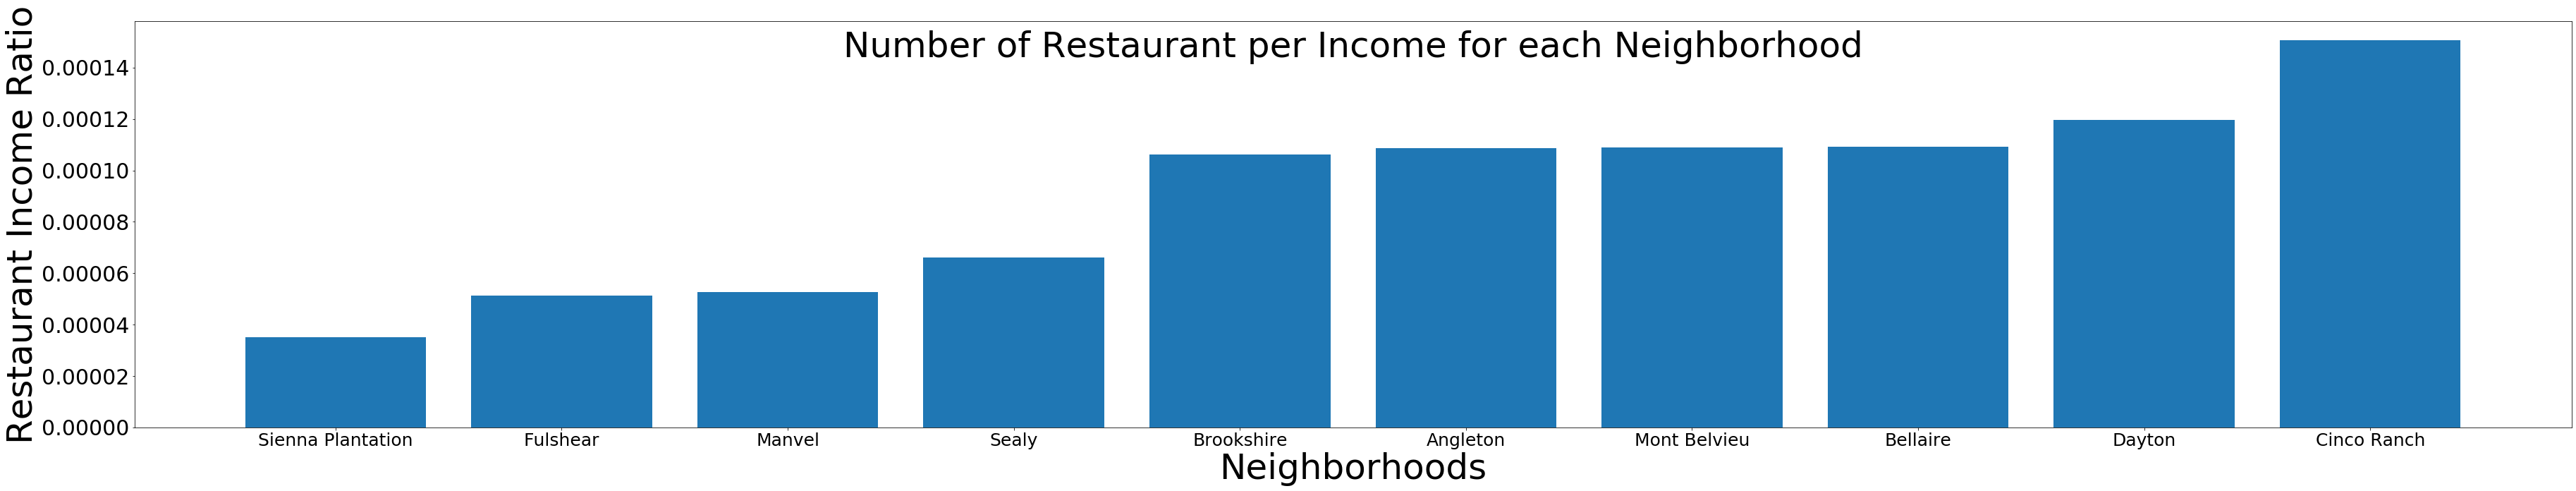

In [107]:
# plot the data to visualize the number of restaurant per family income in each neighborhood. the 10 least value

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,8,2])
Neighborhood = sorted_data['City'].head(10)
restaurantPerIncome = sorted_data['restaurantPerIncome'].head(10)
ax.bar(Neighborhood, restaurantPerIncome)
plt.xticks(size = 25)
plt.yticks(size = 30)
plt.xlabel('Neighborhoods', fontsize = 50, x=0.5, y= -0.001)
plt.ylabel('Restaurant Income Ratio', fontsize = 50, x=0.3, y= 0.5)

plt.title('Number of Restaurant per Income for each Neighborhood', fontsize = 50, x=0.5, y=0.9)

plt.show()


### Sienna Plantation, Fulshear, Manvel, Sealy, Brookshire and Angleton are the neighborhoods with less restaurants per family income

In [109]:
# let sort to find the neighborhood with less restaurant per neighborhood population

sorted_data = houston_census_venues.sort_values('restaurantPerPopulation')


In [110]:
sorted_data.head()

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,point,latitude,longitude,altitude,Venue Latitude,Venue Longitude,number of restuarant,restaurantPerSquareFoot,restaurantPerIncome,restaurantPerPopulation
2,Brazoria,Angleton,30549.568966,27453.448276,0.03,26747.586207,0.06,0.27,0.15,0.53,...,"(29.16941, -95.4318847, 0.0)",29.169410,-95.431885,0.0,29.179284,-95.429897,6,0.532387,0.000109,0.000196
22,Harris,Pasadena,151227.000000,149307.000000,0.01,149043.000000,0.09,0.30,0.10,0.50,...,"(29.6910625, -95.2091006, 0.0)",29.691063,-95.209101,0.0,29.665308,-95.206505,30,0.701590,0.000563,0.000198
25,"Harris,Montgomery",Spring,54298.000000,54298.000000,0.00,54298.000000,0.07,0.27,0.10,0.52,...,"(30.3882613, -95.6963355, 0.0)",30.388261,-95.696336,0.0,30.388676,-95.663189,11,0.474342,0.000159,0.000203
5,Montgomery,Conroe,91079.000000,65392.000000,0.39,56207.000000,0.07,0.24,0.13,0.50,...,"(30.3118769, -95.4560512, 0.0)",30.311877,-95.456051,0.0,30.327755,-95.479026,22,0.417299,0.000385,0.000242
17,Galveston,League City,107536.000000,83584.000000,0.29,83560.000000,0.08,0.28,0.10,0.51,...,"(29.5074538, -95.0949303, 0.0)",29.507454,-95.094930,0.0,29.520495,-95.108385,26,0.506921,0.000248,0.000242


In [111]:
sorted_data.tail()

,County,City,PopulationEstimates2019,PopulationEstimates2010,PopulationPercentChange2010TO2019,PopulationCensus2010,PersonsUnder5Years,PersonsUnder18Years,Persons65YearsAndOver,FemalePersons,...,point,latitude,longitude,altitude,Venue Latitude,Venue Longitude,number of restuarant,restaurantPerSquareFoot,restaurantPerIncome,restaurantPerPopulation
32,Harris,Webster,11451.0,10624.0,0.08,10400.0,0.09,0.22,0.09,0.50,...,"(29.5376944, -95.1220967, 0.0)",29.537694,-95.122097,0.0,29.542335,-95.127965,29,4.574132,0.000560,0.002533
38,Galveston,Bacliff,8619.0,8619.0,0.00,8619.0,0.11,0.30,0.09,0.46,...,"(29.506321, -94.987748, 0.0)",29.506321,-94.987748,0.0,29.529418,-95.008115,22,8.695652,0.000554,0.002553
13,Harris,Jacinto City,10466.0,10553.0,-0.01,10553.0,0.08,0.27,0.11,0.50,...,"(29.7673433, -95.2336723, 0.0)",29.767343,-95.233672,0.0,29.775474,-95.219736,35,18.716578,0.000936,0.003344
52,Harris,Galena Park,10757.0,10899.0,-0.01,10887.0,0.06,0.30,0.08,0.49,...,"(29.7335616, -95.2302123, 0.0)",29.733562,-95.230212,0.0,29.735357,-95.226164,38,7.818930,0.000844,0.003533
12,Harris,Jersey Village,7890.0,7608.0,0.04,7620.0,0.03,0.14,0.21,0.52,...,"(29.888578, -95.5699185, 0.0)",29.888578,-95.569918,0.0,29.906270,-95.583918,28,8.333333,0.000436,0.003549


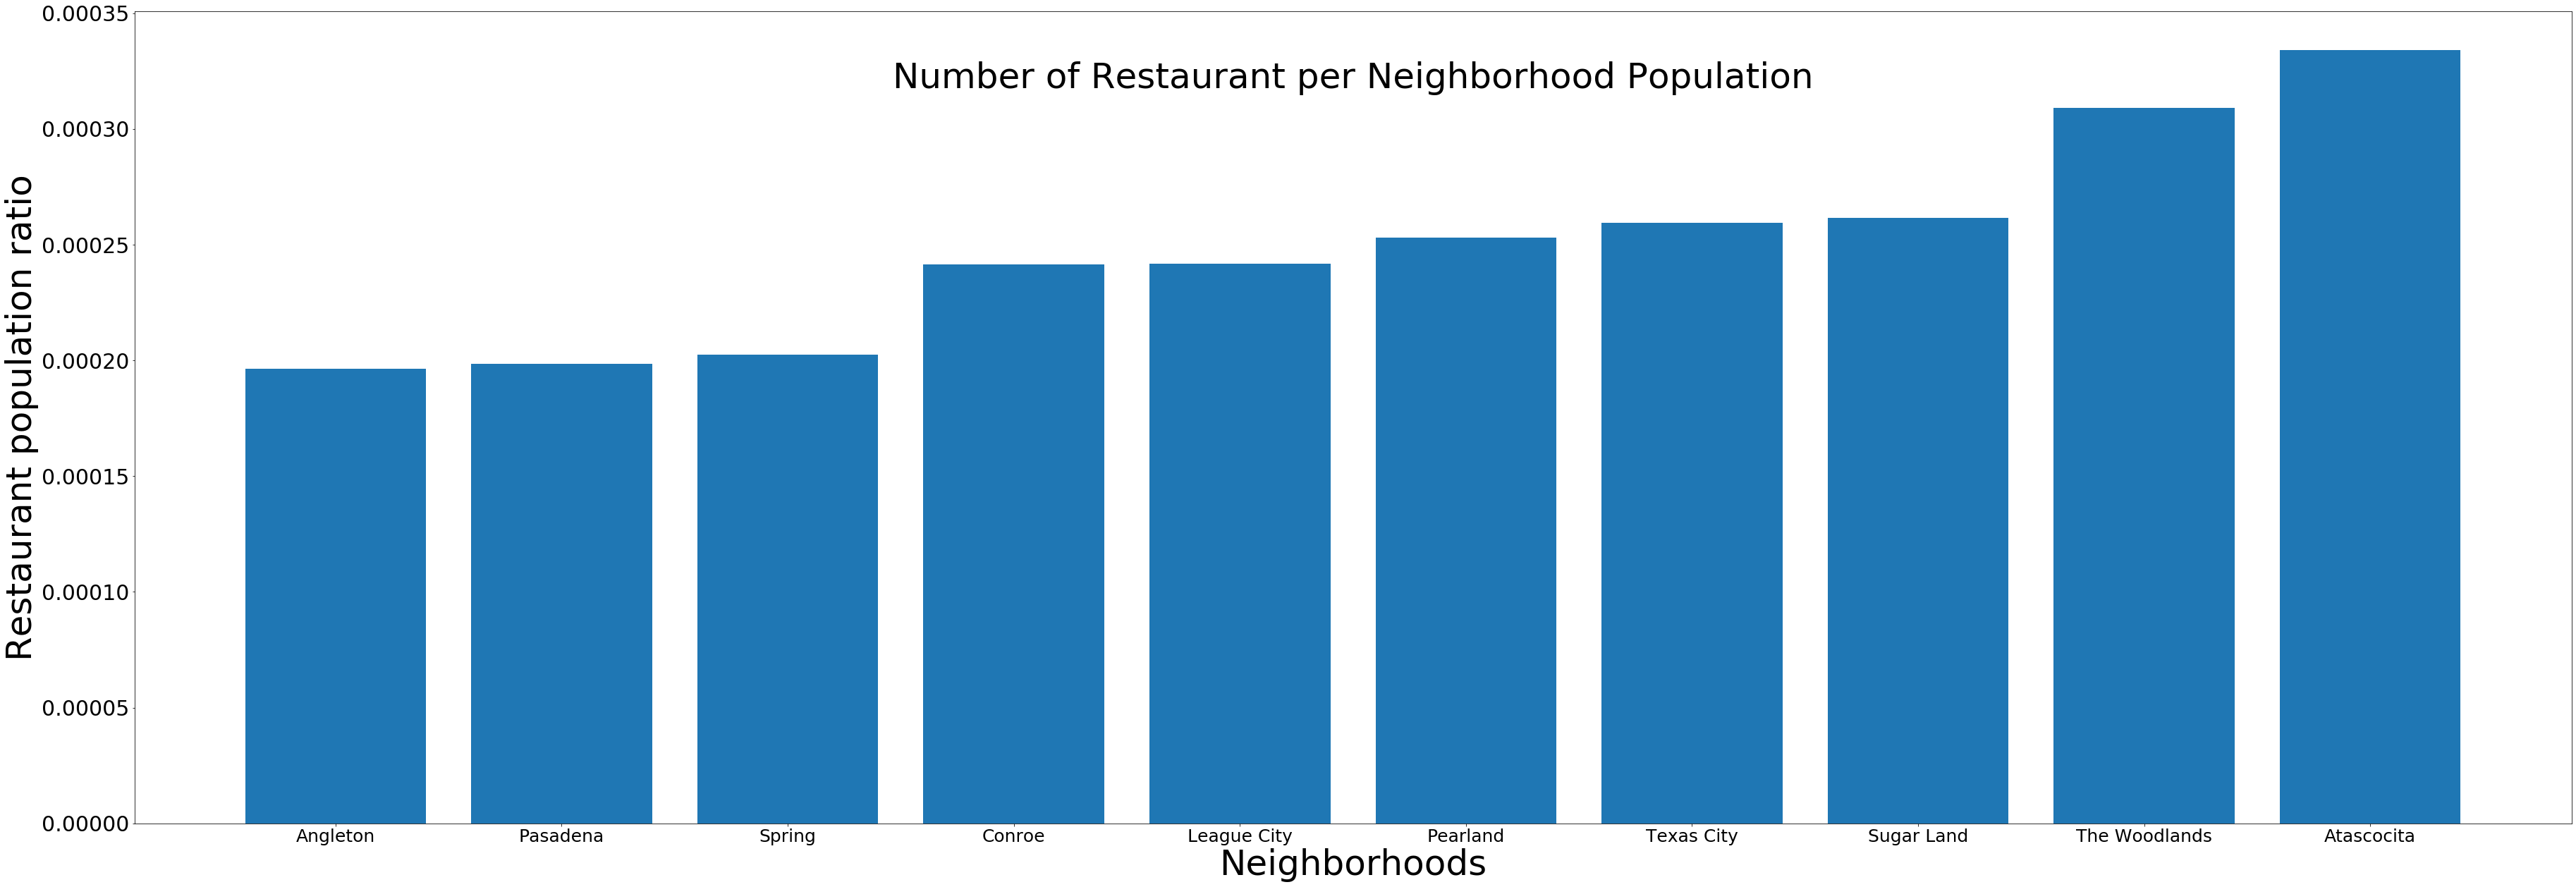

In [113]:
# plot the data to visualize the number of restaurant per  neighborhood population. The 10 least value

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,8,4])
Neighborhood = sorted_data['City'].head(10)
restaurantPerPopulation = sorted_data['restaurantPerPopulation'].head(10)
ax.bar(Neighborhood, restaurantPerPopulation)
plt.xticks(size = 25)
plt.yticks(size = 30)
plt.xlabel('Neighborhoods', fontsize = 50, x=0.5, y= -0.001)
plt.ylabel('Restaurant population ratio', fontsize = 50, x=0.3, y= 0.5)

plt.title('Number of Restaurant per Neighborhood Population', fontsize = 50, x=0.5, y=0.9)

plt.show()

### Angleton, Pasadena, Spring, Conroe, League City and portland are the neighborhood with less restaurants per neighborhood population

### 3.2.2 Clustering Houston Neighborhood and identify their main characteristic

In [115]:
Houston_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bellaire,29.705786,-95.45883,Fadi's Meyerland Mediterranean Grill,29.689590,-95.460313,Middle Eastern Restaurant
1,Bellaire,29.705786,-95.45883,Whole Foods Market,29.706833,-95.441692,Grocery Store
2,Bellaire,29.705786,-95.45883,Chick-fil-A,29.688802,-95.465120,Fast Food Restaurant
3,Bellaire,29.705786,-95.45883,Weekley Family YMCA,29.699716,-95.439474,Gym
4,Bellaire,29.705786,-95.45883,Houston Gymnastics Academy,29.719157,-95.468449,Gymnastics Gym


In [116]:
# find the number of unique Venue Category
print('There are {} uniques categories.'.format(len(Houston_venues['Venue Category'].unique())))

There are 269 uniques categories.


### Analyze each neighborhood

In [117]:
# one hot encoding
houston_onehot = pd.get_dummies(Houston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
houston_onehot['Neighborhood'] = Houston_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [houston_onehot.columns[-1]] + list(houston_onehot.columns[:-1])
houston_onehot = houston_onehot[fixed_columns]

houston_onehot.head()


,Zoo Exhibit,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# new dataframe shape
houston_onehot.shape

(4801, 269)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [119]:
houston_grouped = houston_onehot.groupby('Neighborhood').mean().reset_index()
houston_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Zoo
0,Aldine,0.00,0.0,0.00,0.0,0.0,0.000,0.000000,0.000000,0.0,...,0.000000,0.010000,0.0,0.00,0.0,0.00,0.00,0.020000,0.00,0.000000
1,Alvin,0.00,0.0,0.00,0.0,0.0,0.000,0.037975,0.012658,0.0,...,0.012658,0.000000,0.0,0.00,0.0,0.00,0.00,0.000000,0.00,0.012658
2,Angleton,0.00,0.0,0.05,0.0,0.0,0.025,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.00,0.0,0.00,0.00,0.000000,0.00,0.000000
3,Atascocita,0.00,0.0,0.00,0.0,0.0,0.000,0.011628,0.000000,0.0,...,0.011628,0.000000,0.0,0.00,0.0,0.00,0.00,0.000000,0.00,0.000000
4,Bacliff,0.00,0.0,0.00,0.0,0.0,0.000,0.025316,0.000000,0.0,...,0.000000,0.012658,0.0,0.00,0.0,0.00,0.00,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,The Woodlands,0.00,0.0,0.00,0.0,0.0,0.000,0.030000,0.000000,0.0,...,0.000000,0.000000,0.0,0.00,0.0,0.01,0.01,0.000000,0.00,0.000000
58,Tomball,0.00,0.0,0.01,0.0,0.0,0.000,0.030000,0.000000,0.0,...,0.010000,0.010000,0.0,0.00,0.0,0.01,0.00,0.000000,0.00,0.000000
59,Webster,0.00,0.0,0.00,0.0,0.0,0.000,0.050000,0.000000,0.0,...,0.000000,0.020000,0.0,0.01,0.0,0.00,0.01,0.000000,0.00,0.000000
60,West University Place,0.01,0.0,0.00,0.0,0.0,0.000,0.020000,0.000000,0.0,...,0.000000,0.000000,0.0,0.00,0.0,0.01,0.00,0.000000,0.01,0.010000


### confirm the new size

In [120]:
houston_grouped.shape

(62, 269)

#### Let's print each neighborhood along with the top 5 most common venues

In [121]:
num_top_venues = 5

for hood in houston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = houston_grouped[houston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aldine----
                venue  freq
0  Mexican Restaurant  0.09
1               Hotel  0.08
2        Burger Joint  0.06
3            Pharmacy  0.06
4      Sandwich Place  0.05


----Alvin----
                  venue  freq
0        Discount Store  0.06
1    Mexican Restaurant  0.06
2  Fast Food Restaurant  0.06
3        Sandwich Place  0.05
4           Pizza Place  0.04


----Angleton----
                  venue  freq
0  Fast Food Restaurant  0.08
1        Discount Store  0.08
2   Rental Car Location  0.05
3               Airport  0.05
4           Pizza Place  0.05


----Atascocita----
                  venue  freq
0  Fast Food Restaurant  0.06
1           Coffee Shop  0.06
2    Mexican Restaurant  0.06
3    Italian Restaurant  0.03
4          Burger Joint  0.03


----Bacliff----
                venue  freq
0  Seafood Restaurant  0.11
1                 Bar  0.06
2  Mexican Restaurant  0.06
3         Pizza Place  0.04
4      Discount Store  0.03


----Baytown----
                v

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [122]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [123]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = houston_grouped['Neighborhood']

for ind in np.arange(houston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(houston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(40)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldine,Mexican Restaurant,Hotel,Burger Joint,Pharmacy,Sandwich Place,Seafood Restaurant,Fried Chicken Joint,Rental Car Location,Park,Discount Store
1,Alvin,Discount Store,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,Donut Shop,Gas Station,Fried Chicken Joint,Seafood Restaurant,American Restaurant,Pizza Place
2,Angleton,Fast Food Restaurant,Discount Store,Pharmacy,Rental Car Location,Pizza Place,Airport,Taco Place,Fried Chicken Joint,Tex-Mex Restaurant,Donut Shop
3,Atascocita,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Gym,Discount Store,Italian Restaurant,Golf Course,Gas Station,Park
4,Bacliff,Seafood Restaurant,Bar,Mexican Restaurant,Pizza Place,Café,Playground,Fried Chicken Joint,Burger Joint,Greek Restaurant,Theme Park
5,Baytown,Mexican Restaurant,Discount Store,Steakhouse,American Restaurant,Coffee Shop,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Sandwich Place
6,Bellaire,Burger Joint,Seafood Restaurant,Ice Cream Shop,Steakhouse,Café,Shopping Mall,Department Store,Dessert Shop,American Restaurant,Taco Place
7,Brookshire,Fast Food Restaurant,Fried Chicken Joint,Hotel,Athletics & Sports,Pizza Place,Discount Store,Construction & Landscaping,Park,Sandwich Place,Other Repair Shop
8,Channelview,Mexican Restaurant,Discount Store,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Burger Joint,BBQ Joint,Pharmacy,Sandwich Place,Video Game Store
9,Cinco Ranch,Grocery Store,Mexican Restaurant,Coffee Shop,Fast Food Restaurant,BBQ Joint,Liquor Store,Supermarket,Bakery,Sushi Restaurant,Italian Restaurant


### Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [124]:
# set number of clusters
kclusters = 5

houston_grouped_clustering = houston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(houston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 3, 2, 0, 3, 2, 4, 3, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [125]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

houston_merged = houston_data

# merge houston_grouped with houston_data to add latitude/longitude for each neighborhood
houston_merged = houston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


houston_merged.tail(30) # check the last columns!

,County,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Harris,West University Place,29.718007,-95.433829,2,Ice Cream Shop,Grocery Store,Café,Shopping Mall,Food Truck,Pizza Place,New American Restaurant,Italian Restaurant,Burger Joint,Steakhouse
32,Harris,Webster,29.537694,-95.122097,2,Mexican Restaurant,Coffee Shop,American Restaurant,Cosmetics Shop,Science Museum,Park,Pizza Place,Hotel,Furniture / Home Store,Sporting Goods Shop
33,Harris,Tomball,30.097162,-95.616055,2,Mexican Restaurant,Pharmacy,Fast Food Restaurant,Pizza Place,Burger Joint,Coffee Shop,Park,American Restaurant,Italian Restaurant,Sandwich Place
34,Galveston,Texas City,29.396013,-94.917548,3,Discount Store,Fast Food Restaurant,Sandwich Place,Mexican Restaurant,Burger Joint,Convenience Store,Grocery Store,Fried Chicken Joint,Bar,Pharmacy
35,Fort Bend,Sugar Land,29.619679,-95.634946,2,Mexican Restaurant,Park,Grocery Store,Bakery,American Restaurant,Fast Food Restaurant,Burger Joint,Coffee Shop,Ice Cream Shop,Cajun / Creole Restaurant
36,Fort Bend,Stafford city,29.616067,-95.557722,2,Mexican Restaurant,Fast Food Restaurant,Department Store,Grocery Store,Pharmacy,Park,Liquor Store,Gym,Cajun / Creole Restaurant,Furniture / Home Store
37,Harris,Channelview,29.776060,-95.114653,3,Mexican Restaurant,Discount Store,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Burger Joint,BBQ Joint,Pharmacy,Sandwich Place,Video Game Store
38,Galveston,Bacliff,29.506321,-94.987748,0,Seafood Restaurant,Bar,Mexican Restaurant,Pizza Place,Café,Playground,Fried Chicken Joint,Burger Joint,Greek Restaurant,Theme Park
39,Harris,Atascocita,29.999007,-95.162014,2,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Gym,Discount Store,Italian Restaurant,Golf Course,Gas Station,Park
40,Harris,Aldine,29.899877,-95.337368,0,Mexican Restaurant,Hotel,Burger Joint,Pharmacy,Sandwich Place,Seafood Restaurant,Fried Chicken Joint,Rental Car Location,Park,Discount Store


Finally, let's visualize the resulting clusters

In [126]:
# create map
map_clusters = folium.Map(location=[29.4, -95.2], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(houston_merged['latitude'], houston_merged['longitude'], houston_merged['Neighborhood'], houston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 3.2.3  Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [127]:
houston_merged.loc[houston_merged['Cluster Labels'] == 0, houston_merged.columns[[1] + list(range(5, houston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Jacinto City,Mexican Restaurant,Discount Store,Seafood Restaurant,Sandwich Place,Pharmacy,Chinese Restaurant,Fast Food Restaurant,Pizza Place,BBQ Joint,Burger Joint
22,Pasadena,Mexican Restaurant,Burger Joint,Fast Food Restaurant,Pharmacy,Cosmetics Shop,Discount Store,Sporting Goods Shop,Park,BBQ Joint,Coffee Shop
38,Bacliff,Seafood Restaurant,Bar,Mexican Restaurant,Pizza Place,Café,Playground,Fried Chicken Joint,Burger Joint,Greek Restaurant,Theme Park
40,Aldine,Mexican Restaurant,Hotel,Burger Joint,Pharmacy,Sandwich Place,Seafood Restaurant,Fried Chicken Joint,Rental Car Location,Park,Discount Store
47,Cloverleaf,Mexican Restaurant,Discount Store,Pharmacy,Seafood Restaurant,Sandwich Place,Burger Joint,BBQ Joint,Pizza Place,Chinese Restaurant,Ice Cream Shop
52,Galena Park,Mexican Restaurant,Pharmacy,Seafood Restaurant,BBQ Joint,Wings Joint,Burger Joint,Chinese Restaurant,Diner,Park,Sandwich Place
61,Galveston,Seafood Restaurant,Bar,Beach,Coffee Shop,Ice Cream Shop,Burger Joint,Museum,Sandwich Place,Hotel,Mexican Restaurant


#### Cluster 2

In [128]:
houston_merged.loc[houston_merged['Cluster Labels'] == 1, houston_merged.columns[[1] + list(range(5, houston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,Hardin County,Athletics & Sports,Discount Store,Pet Store,Zoo,Flower Shop,Fireworks Store,Fish Market,Fishing Store,Flea Market,Food


#### Cluster 3

In [129]:
houston_merged.loc[houston_merged['Cluster Labels'] == 2, houston_merged.columns[[1] + list(range(5, houston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bellaire,Burger Joint,Seafood Restaurant,Ice Cream Shop,Steakhouse,Café,Shopping Mall,Department Store,Dessert Shop,American Restaurant,Taco Place
5,Conroe,Mexican Restaurant,Fast Food Restaurant,Burger Joint,Breakfast Spot,Steakhouse,Park,Cosmetics Shop,Fried Chicken Joint,Sandwich Place,Restaurant
11,Katy,Mexican Restaurant,Grocery Store,Sporting Goods Shop,Fast Food Restaurant,American Restaurant,Burger Joint,Clothing Store,Coffee Shop,Hotel,BBQ Joint
12,Jersey Village,Burger Joint,Sandwich Place,Coffee Shop,American Restaurant,Asian Restaurant,Fast Food Restaurant,Mexican Restaurant,Hotel,Seafood Restaurant,Smoothie Shop
14,Humble,Mexican Restaurant,Coffee Shop,Fast Food Restaurant,Seafood Restaurant,Gym,Burger Joint,Airport Lounge,Furniture / Home Store,American Restaurant,Steakhouse
17,League City,Mexican Restaurant,Park,Coffee Shop,American Restaurant,Gym,Science Museum,Bakery,Fast Food Restaurant,Grocery Store,Pizza Place
19,Richmond,Mexican Restaurant,Fast Food Restaurant,Coffee Shop,Burger Joint,Pharmacy,Discount Store,Café,BBQ Joint,Pizza Place,Supermarket
21,Pearland,Mexican Restaurant,Coffee Shop,Fast Food Restaurant,Grocery Store,Donut Shop,Burger Joint,Asian Restaurant,Park,Pizza Place,Vietnamese Restaurant
24,Missouri City,Mexican Restaurant,Park,Pharmacy,Fast Food Restaurant,Cajun / Creole Restaurant,Fried Chicken Joint,Grocery Store,Chinese Restaurant,Ice Cream Shop,Liquor Store
26,South Houston,Burger Joint,Mexican Restaurant,Pizza Place,Park,Fast Food Restaurant,Vietnamese Restaurant,Pharmacy,Diner,Sporting Goods Shop,Coffee Shop


#### Cluster 4

In [130]:
houston_merged.loc[houston_merged['Cluster Labels'] == 3, houston_merged.columns[[1] + list(range(5, houston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Baytown,Mexican Restaurant,Discount Store,Steakhouse,American Restaurant,Coffee Shop,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Sandwich Place
2,Angleton,Fast Food Restaurant,Discount Store,Pharmacy,Rental Car Location,Pizza Place,Airport,Taco Place,Fried Chicken Joint,Tex-Mex Restaurant,Donut Shop
3,Alvin,Discount Store,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,Donut Shop,Gas Station,Fried Chicken Joint,Seafood Restaurant,American Restaurant,Pizza Place
6,Clute,Pizza Place,Discount Store,Fast Food Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Convenience Store,Pharmacy,American Restaurant,Seafood Restaurant
9,LaPorte,Sandwich Place,Gas Station,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Discount Store,BBQ Joint,Fried Chicken Joint,Convenience Store,Pharmacy
10,LaMarque,Mexican Restaurant,Sandwich Place,Discount Store,Burger Joint,Fast Food Restaurant,Bar,Pharmacy,Pizza Place,Italian Restaurant,Convenience Store
25,Spring,American Restaurant,Pizza Place,Convenience Store,Burger Joint,Discount Store,Mexican Restaurant,Pharmacy,Grocery Store,BBQ Joint,Sandwich Place
29,Santa Fe,Clothing Store,Fast Food Restaurant,Shoe Store,Accessories Store,Gas Station,Discount Store,Pizza Place,Grocery Store,Fried Chicken Joint,Sandwich Place
34,Texas City,Discount Store,Fast Food Restaurant,Sandwich Place,Mexican Restaurant,Burger Joint,Convenience Store,Grocery Store,Fried Chicken Joint,Bar,Pharmacy
37,Channelview,Mexican Restaurant,Discount Store,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Burger Joint,BBQ Joint,Pharmacy,Sandwich Place,Video Game Store


#### Cluster 5

In [131]:
houston_merged.loc[houston_merged['Cluster Labels'] == 4, houston_merged.columns[[1] + list(range(5, houston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Dayton,Discount Store,Fast Food Restaurant,Mexican Restaurant,Ice Cream Shop,Gym,Pizza Place,Convenience Store,Pharmacy,Sandwich Place,Gas Station
7,Cleveland,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Pharmacy,Convenience Store,Fried Chicken Joint,Gas Station,Discount Store,Grocery Store,Bank
8,Brookshire,Fast Food Restaurant,Fried Chicken Joint,Hotel,Athletics & Sports,Pizza Place,Discount Store,Construction & Landscaping,Park,Sandwich Place,Other Repair Shop
15,Manvel,Fast Food Restaurant,Farm,Gas Station,Fried Chicken Joint,Seafood Restaurant,Sandwich Place,Hotel,Cajun / Creole Restaurant,Flower Shop,Athletics & Sports
16,Liberty,Fast Food Restaurant,Burger Joint,Department Store,Gym / Fitness Center,Business Service,Fried Chicken Joint,Pizza Place,Mobile Phone Shop,Gas Station,Mexican Restaurant
20,Prairie View,Fast Food Restaurant,BBQ Joint,Discount Store,Gas Station,Seafood Restaurant,Pizza Place,Post Office,Hotel Bar,Sandwich Place,Business Service
23,Mont Belvieu,Fast Food Restaurant,Sandwich Place,Discount Store,Mexican Restaurant,Grocery Store,Fried Chicken Joint,Ice Cream Shop,Burger Joint,Gas Station,BBQ Joint
27,Sealy,Gas Station,Fast Food Restaurant,Sandwich Place,Discount Store,Pizza Place,Pharmacy,Burger Joint,BBQ Joint,State / Provincial Park,Market
42,Willis,Fast Food Restaurant,Gas Station,Golf Course,Sandwich Place,Pizza Place,American Restaurant,Mexican Restaurant,Resort,BBQ Joint,Coffee Shop
59,Hempstead,Fast Food Restaurant,Seafood Restaurant,Ice Cream Shop,Big Box Store,Farmers Market,Farm,Sandwich Place,Fried Chicken Joint,Bank,BBQ Joint


### Sumarizing Clusters Characteristics

#### Cluster 1:  Mexican Restaurant 
#### Cluster 2:  Atlhetics & Sports
#### Cluster 3:  A combination of Mexican restaurants $ Burger Joint
#### Cluster 4:  Pizza Place & Sandwich Place
#### Cluster 5:  Fast Food Restaurant

## **3.3 Inferial Statistical Testing**`

### we will find out what is the expected population growth in Manvel by 2025

In [148]:
# for the Manvel let define a dataframe with the data of interest

Manvelpop = {2010: 5179, 2019: 12671}

In [153]:
### covert the dictionary into a dataframe

ManvelPopData = pd.DataFrame(list(Manvelpop.items()),columns = ['Year','population'])

print (ManvelPopData)


   Year  population
0  2010        5179
1  2019       12671


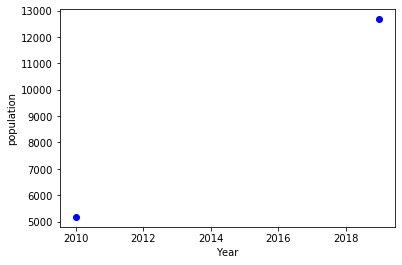

In [154]:
plt.scatter(ManvelPopData.Year, ManvelPopData.population,  color='blue')
plt.xlabel("Year")
plt.ylabel("population")
plt.show()

#### Modeling Using sklearn package


In [155]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(ManvelPopData[['Year']])
train_y = np.asanyarray(ManvelPopData[['population']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[832.44444444]]
Intercept:  [-1668034.33333333]


In [156]:
#### plot the fit line

Text(0, 0.5, 'population')

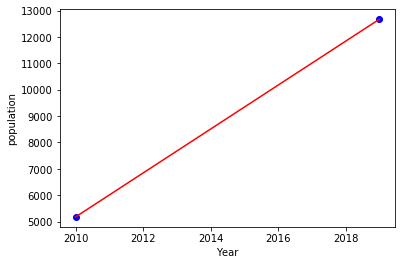

In [157]:
plt.scatter(ManvelPopData.Year, ManvelPopData.population,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("population")

In [158]:
# estimated Manvel population in 2025
test_x = 2025

test_y_hat = regr.coef_[0][0]*test_x + regr.intercept_[0]
print(test_y_hat)

17665.666666666744


In [160]:
# Manvel population increased from 2019 to 2025
((17666 - 12671)/12671)*100


39.42072448899061

### The Manvel population is expected to increase at a rate of 39.4% from 2019 to 2025

### Expected population growth in Angleton by 2025

In [162]:
# for the Angleton let define a dataframe with the data of interest

Angletonpop = {2010: 26748, 2019: 30550}

In [163]:
### covert the dictionary into a dataframe

AngletonPopData = pd.DataFrame(list(Angletonpop.items()),columns = ['Year','population'])

print (AngletonPopData)


   Year  population
0  2010       26748
1  2019       30550


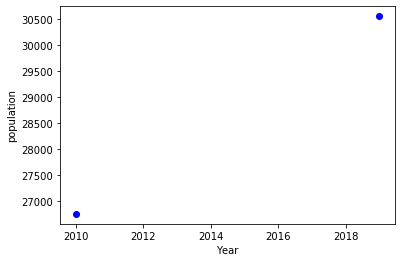

In [164]:
plt.scatter(AngletonPopData.Year, AngletonPopData.population,  color='blue')
plt.xlabel("Year")
plt.ylabel("population")
plt.show()

#### Modeling Using sklearn package

In [166]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(AngletonPopData[['Year']])
train_y = np.asanyarray(AngletonPopData[['population']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[422.44444444]]
Intercept:  [-822365.33333333]


### plot the fitline

Text(0, 0.5, 'population')

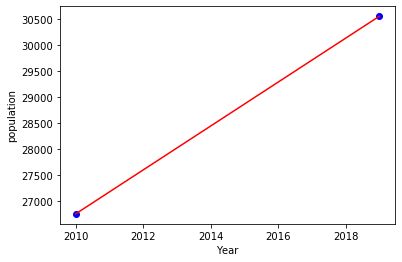

In [167]:
plt.scatter(AngletonPopData.Year, AngletonPopData.population,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("population")

In [168]:
# estimated Angleton population in 2025
test_x = 2025

test_y_hat = regr.coef_[0][0]*test_x + regr.intercept_[0]
print(test_y_hat)

33084.66666666663


In [169]:
# Manvel population increased from 2019 to 2025
((33085 - 30550)/30550)*100


8.297872340425531

### The Angleton population is expected to increase at a rate of 8.3% from 2019 to 2025

# **4 Results**

The question we are trying to answer by this project is what is the best neighborhood to open a restaurant in Houston?
To answer the question we will first summarize the result gain from the study. The results are presented in form of Key Performance Indicators (KPI)

## **4.1 Key Performance Indicators**

### **4.1.1 Number of Restaurant in each Neighborhood**

What are the Neighborhoods with less number of restaurants

In [171]:
# let sort to find the Neighborhood with most number of restaurant

sorted_data = houston_census_venues.sort_values('number of restuarant')


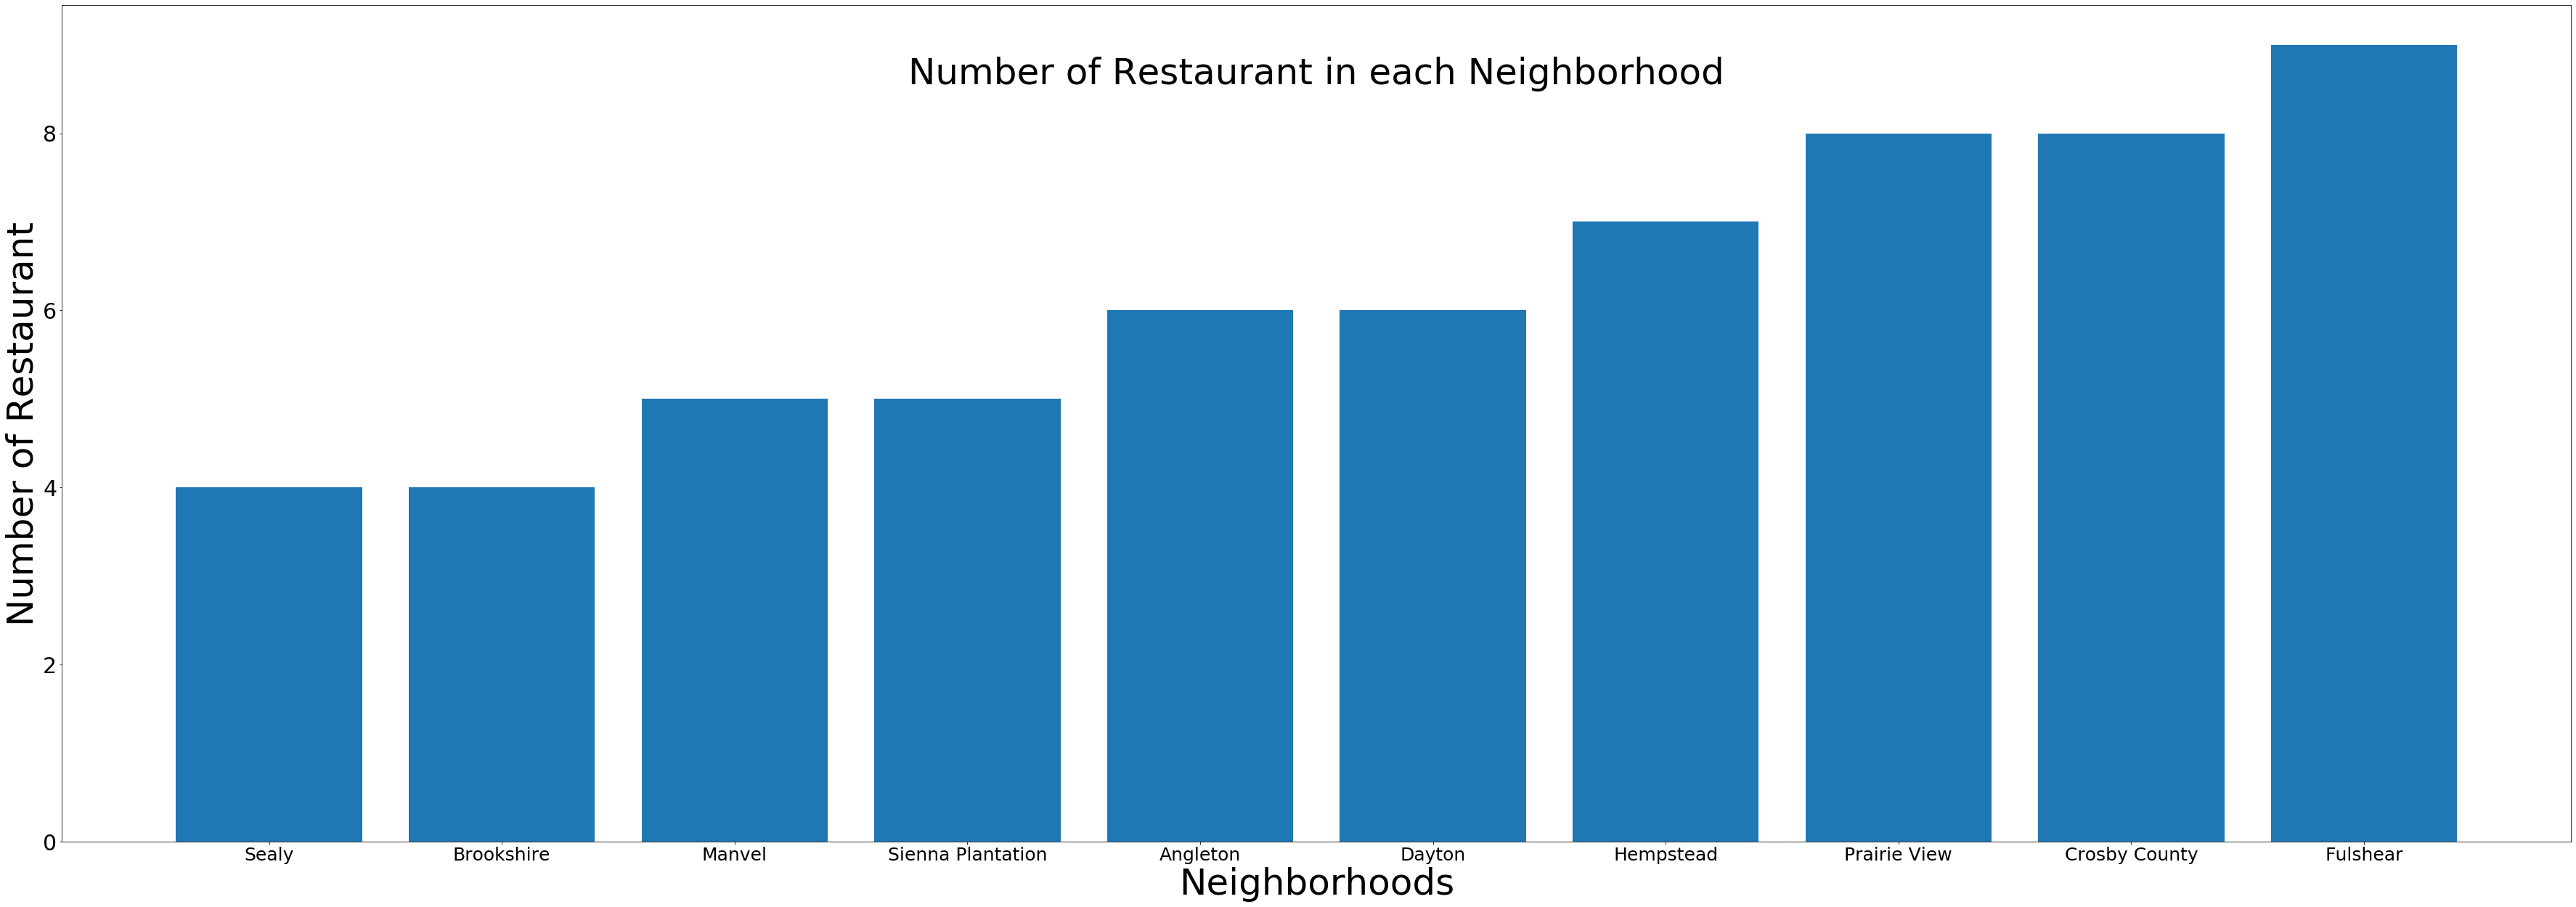

In [141]:
# plot the data to visualize the number of restaurant by neighborhood. just the 10 first neighborhood with less restaurant

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,8,4])
Neighborhood = sorted_data['City'].head(10)
numberOfRestaurant = sorted_data['number of restuarant'].head(10)
ax.bar(Neighborhood, numberOfRestaurant)

plt.xticks(size = 25)
plt.yticks(size = 30)
plt.xlabel('Neighborhoods', fontsize = 50, x=0.5, y= -0.001)
plt.ylabel('Number of Restaurant', fontsize = 50, x=0.3, y= 0.5)

plt.title('Number of Restaurant in each Neighborhood', fontsize = 50, x=0.5, y=0.9)
plt.show()



### the six Neighborhood with less reataurants are:
### sealy, Brookshire, Manvel, Sienna Plantation, Angleton and Dayton

### **4.1.2 Number of Restaurants per sqft in each Neighborhood**

In [142]:
# let sort to find the neighborhood with less restaurant density

sorted_data = houston_census_venues.sort_values('restaurantPerSquareFoot')

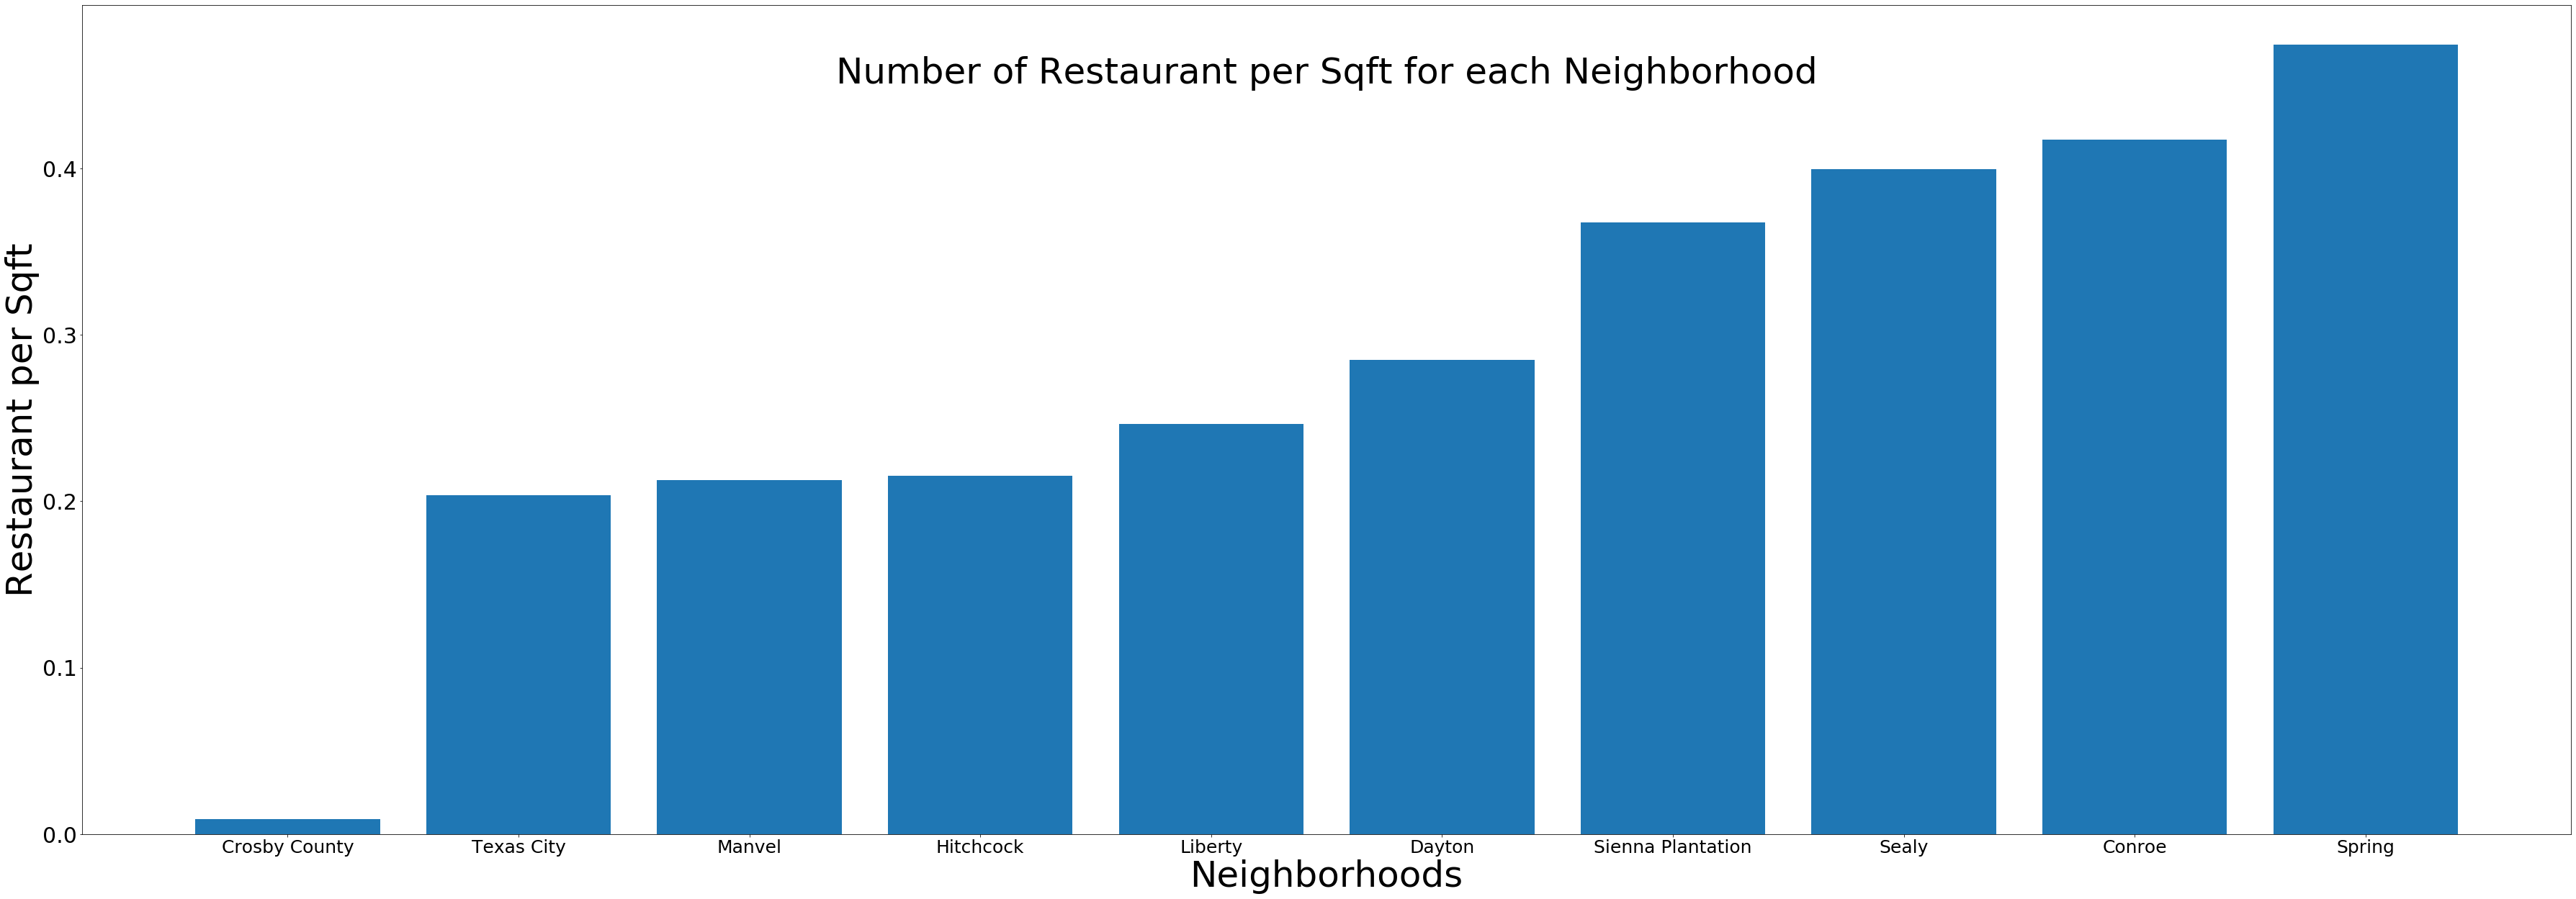

In [143]:
# plot the data to visualize the density of restaurant by neighborhood. the 10 less dense Neighborhood

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([2,2,8,4])
Neighborhood = sorted_data['City'].head(10)
restaurantPerSquareFoot = sorted_data['restaurantPerSquareFoot'].head(10)
ax.bar(Neighborhood, restaurantPerSquareFoot)
plt.xticks(size = 25)
plt.yticks(size = 30)
plt.xlabel('Neighborhoods', fontsize = 50, x=0.5, y= -0.001)
plt.ylabel('Restaurant per Sqft', fontsize = 50, x=0.3, y= 0.5)

plt.title('Number of Restaurant per Sqft for each Neighborhood', fontsize = 50, x=0.5, y=0.9)
plt.show()

#### The less dense Neighborhood in terms of restaurant per sqft are:
#### Crosby County, Texas City, Manvel, Hitchcock, Liberty and Dayton

### **4.1.3 Number of Restaurants per family income in each Neighborhood**

In [144]:
#### let sort to find the neighborhood with less restaurant per family income

sorted_data = houston_census_venues.sort_values('restaurantPerIncome')


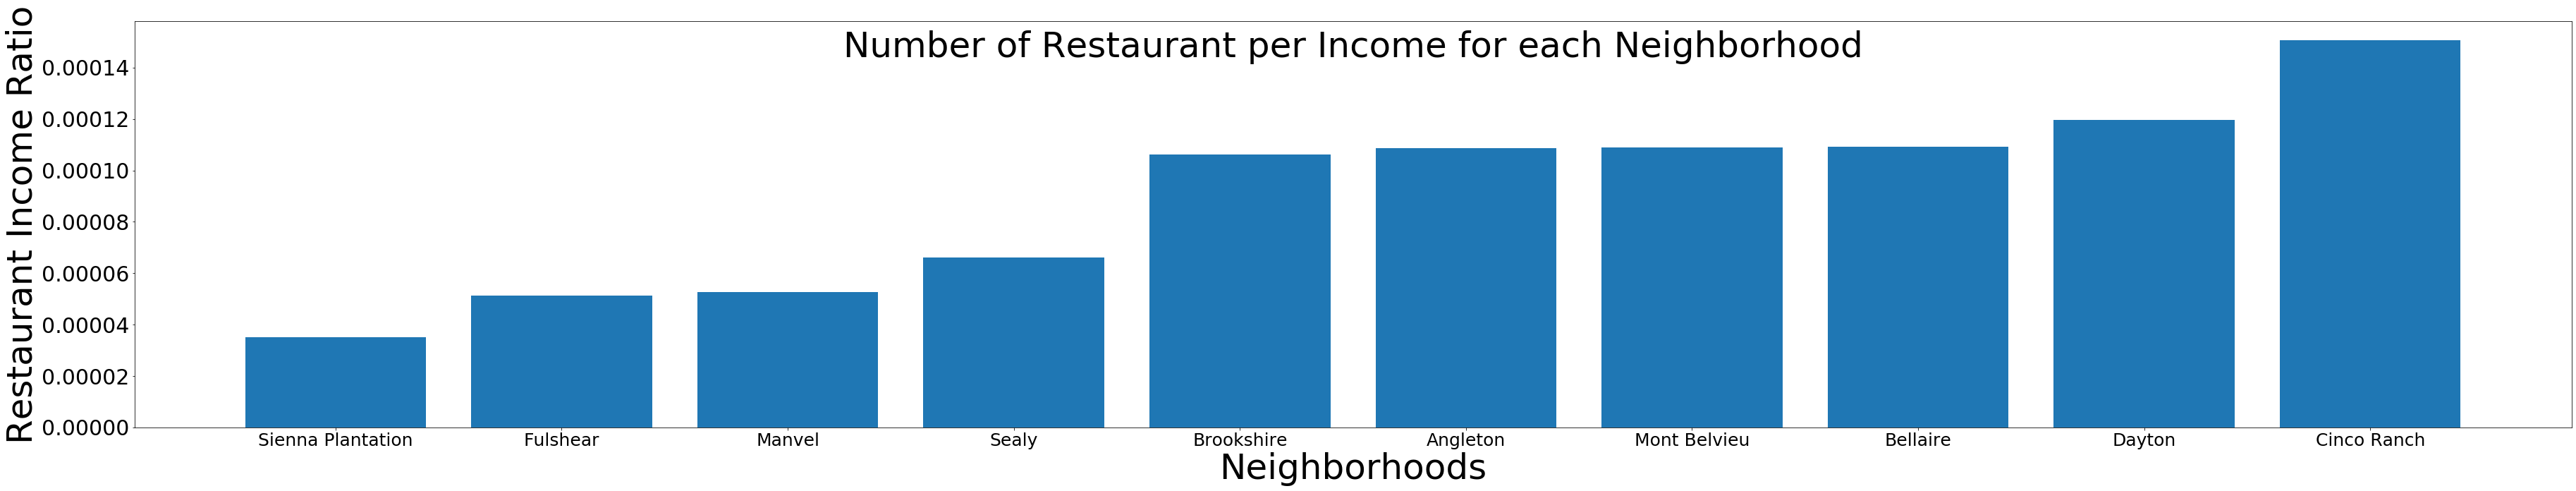

In [145]:
# plot the data to visualize the number of restaurant per family income in each neighborhood. the 10 least value

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,8,2])
Neighborhood = sorted_data['City'].head(10)
restaurantPerIncome = sorted_data['restaurantPerIncome'].head(10)
ax.bar(Neighborhood, restaurantPerIncome)
plt.xticks(size = 25)
plt.yticks(size = 30)
plt.xlabel('Neighborhoods', fontsize = 50, x=0.5, y= -0.001)
plt.ylabel('Restaurant Income Ratio', fontsize = 50, x=0.3, y= 0.5)

plt.title('Number of Restaurant per Income for each Neighborhood', fontsize = 50, x=0.5, y=0.9)

plt.show()


#### The Neighborhood with less restaurants per income are:
#### Sienna Plantation, Fulshear, Manvel, Sealy, Brookshire and Angleton

### **4.1.4 Number of Restaurants per population in each Neighborhood**

In [146]:
# let sort to find the neighborhood with less restaurant per neighborhood population
sorted_data = houston_census_venues.sort_values('restaurantPerPopulation')

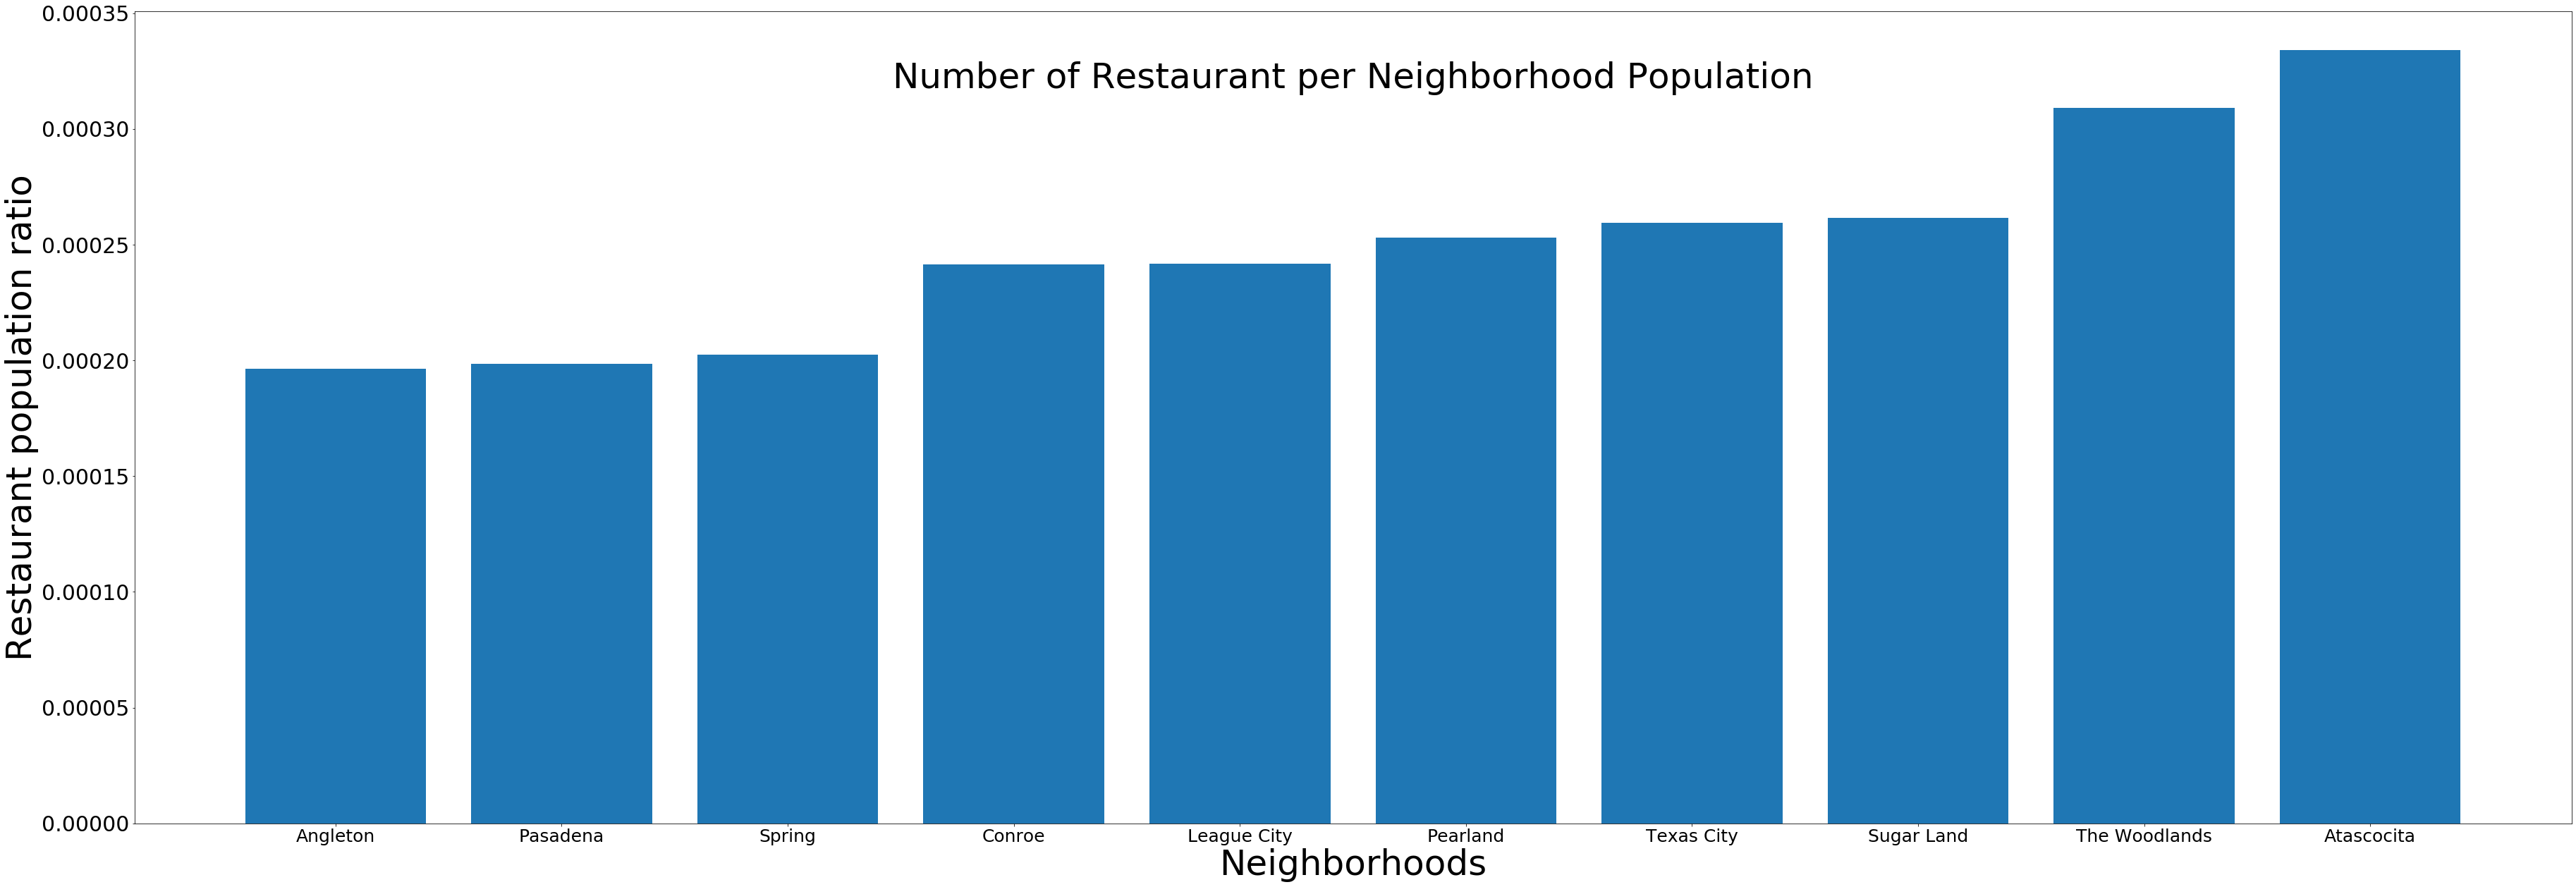

In [147]:
# plot the data to visualize the number of restaurant per  neighborhood population. The 10 least value

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,8,4])
Neighborhood = sorted_data['City'].head(10)
restaurantPerPopulation = sorted_data['restaurantPerPopulation'].head(10)
ax.bar(Neighborhood, restaurantPerPopulation)
plt.xticks(size = 25)
plt.yticks(size = 30)
plt.xlabel('Neighborhoods', fontsize = 50, x=0.5, y= -0.001)
plt.ylabel('Restaurant population ratio', fontsize = 50, x=0.3, y= 0.5)

plt.title('Number of Restaurant per Neighborhood Population', fontsize = 50, x=0.5, y=0.9)

plt.show()

#### Neighborhoods with less Restaurant per population are:
#### Angleton, Pasadena, Spring, Conroe, League City and Pearland


### **4.2 Sumarizing Clusters Characteristics**

#### Cluster 1:  Mexican Restaurant 
#### Cluster 2:  Atlhetics & Sports
#### Cluster 3:  A combination of Mexican restaurants $ Burger Joint
#### Cluster 4:  Pizza Place & Sandwich Place
#### Cluster 5:  Fast Food Restaurant

### **4.3 Population in Manvel and Angleton Neighborhood by 2025**

#### Base on the population of 2010 and 2019, the population of Manvel was estimated to be 17665 in 2025. A 39.4% increase from 2019
#### Base on the population of 2010 and 2019, the population of Angleton was estimated to be 33085 in 2025. A 8.3% increase from 2019


# **5 Discussion**

#### From the 4 KPI's above, we can all agreed that the family income is very important for where we want to establish the restaurant. 
#### people who have higher income will probably eat out more often. But the income alone is not enough. We want to capture the neighborhood with less restaurant per income ratio.
#### The other KPI are mainly to find out where the competition is low.

#### Neighborhood with less number of restaurant: sealy, Brookshire, Manvel, Sienna Plantation, Angleton and Dayton
#### Neighborhood with less restaurant per income: Sienna Plantation, Fulshear, Manvel, Sealy, Brookshire and Angleton
#### Neighborhood with less restaurant per sqft: Crosby County, Texas City, Manvel, Hitchcock, Liberty and Dayton
#### Neighborhood with less restaurant per population: Angleton, Pasadena, Spring, Conroe, League City and Pearland
    
#### Manvel and Angleton are the neighborhoods appearing in 3 of the 4 KPI's categories at the position of interest(low value of the KPI's).
#### Manvel and Angleton  are the Neighborhoods I proposed we should open the new Restaurants at.
#### Since Angleton has a lower number of restaurant per population than Manvel, wich means the competition might be better at Angleton, I will suggest to open the restaurant at Angleton.
#### Also Angleton has a larger population than Manvel. Although Manvel population is increasing at a faster rate, it will take more than 10 years to cash up.
#### in order of priority I will suggest Angleton, Manvel and then other neighborhood appearing at least in 2 of the KPI's in the right level like Sealy, Brookshire and Dayton.



# **6 Conclusion**

#### I was able to find the Houston Neighborhood for opening the new restaurant at. In order of priorty Angleton and Manvel.
#### Since according to the data Angleton  and Manvel came out as the best neighborhoods to create a restaurant, another question is where exactly in Angleton  or Manvel should the restaurant be opened? 
#### This can be the subject of another project. Also the type of restaurant to be opened is also very important.
#### the k nearest neighbor help us to localize the restaurant by type on Houston mappe. This will guide to choose a type which is not already abondant in the neighborhood 
